# Property Valuation Using Machine Learning

**PROBLEM STATEMENT:**

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.For example, if we want to sell a house and we don’t know the price which we can take — it can’t be too low or too high. To find house price we usually try to find similar properties in your neighbourhoodand based on gathered data we will try to assess the house price.

In real estate, determining the accurate property values is a daunting task. The property valuation cannot be determined with few attributes like location, neighborhood sale price, market conditions. Beyond the fact, several multi-faceted approaches are required to determine the property pricing. 

**OBJECTIVE:**

A sophisticated approach is required to address those limitations by focusing on collecting past data with several attributes and incorporating the machine learning approach. 

The goal of this project is to develop an accurate and reliable system for predicting residential property prices by analyzing various factors such as location, area, renovation history, year built, and quality scores.

To achieve this, multiple machine learning models will be implemented, including:

- **Linear Regression**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**
- **Stacking**

The performance of these models will be evaluated using key metrics, specifically **Mean Absolute Error (MAE)** and **R-Squared (R²)**.

By comparing these models, the project aims to provide valuable insights into the effectiveness of different approaches for predicting a continuous variable based on numerous features, ultimately guiding the selection of the most suitable model for house price prediction.prediction.

# 1. EXPLORATORY DATA ANALYSIS(EDA)

## 1.1. Load the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## 1.2. Import the dataset

In [2]:
Data  = pd.read_csv('innercity.csv')
Data

cid         dayhours   price  room_bed  room_bath  \
0      3034200666  20141107T000000  808100         4       3.25   
1      8731981640  20141204T000000  277500         4       2.50   
2      5104530220  20150420T000000  404000         3       2.50   
3      6145600285  20140529T000000  300000         2       1.00   
4      8924100111  20150424T000000  699000         2       1.50   
...           ...              ...     ...       ...        ...   
21608  5137800030  20140701T000000  300000         4       2.50   
21609  8562890910  20140619T000000  320000         4       2.50   
21610  1442880160  20140627T000000  483453         4       2.75   
21611   622100130  20140917T000000  365000         2       2.00   
21612  6413600276  20150324T000000  354950         3       1.00   

       living_measure  lot_measure  ceil  coast  sight  ...  basement  \
0                3020        13457   1.0      0      0  ...         0   
1                2550         7500   1.0      0      0  ...       800   
2                2370         4324   2.0      0      0  ...         0   
3                 820         3844   1.0      0      0  ...         0   
4                1400         4050   1.0      0      0  ...         0   
...               ...          ...   ...    ...    ...  ...       ...   
21608            2303         3826   2.0      0      0  ...         0   
21609            3490         5000   2.0      0      0  ...         0   
21610            2790         5527   2.0      0      0  ...         0   
21611            1440        15000   1.0      0      0  ...         0   
21612             970         5922   1.5      0      0  ...         0   

       yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0          1956             0    98133  47.7174 -122.336              2120   
1          1976             0    98023  47.3165 -122.386              2260   
2          2006             0    98038  47.3515 -121.999              2370   
3          1916             0    98133  47.7049 -122.349              1520   
4          1954             0    98115  47.6768 -122.269              1900   
...         ...           ...      ...      ...      ...               ...   
21608      2006             0    98092  47.3258 -122.165              2516   
21609      2003             0    98042  47.3772 -122.127              2910   
21610      2014             0    98045  47.4827 -121.773              2620   
21611      1985             0    98072  47.7648 -122.159              1780   
21612      1949             0    98125  47.7190 -122.321              1730   

       lot_measure15  furnished  total_area  
0               7553          1       16477  
1               8800          0       10050  
2               4348          0        6694  
3               3844          0        4664  
4               5940          0        5450  
...              ...        ...         ...  
21608           4500          0        6129  
21609           5025          0        8490  
21610           5509          0        8317  
21611          15000          0       16440  
21612           6128          0        6892  

[21613 rows x 23 columns]

## 1.3. Check the Dimension of data

In [3]:
Data.shape

(21613, 23)

## 1.4. Check the Information about the data and the datatypes of each respective attributes.

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

## EDA Descriptive Statistics

## 1.5 Distribution of Data

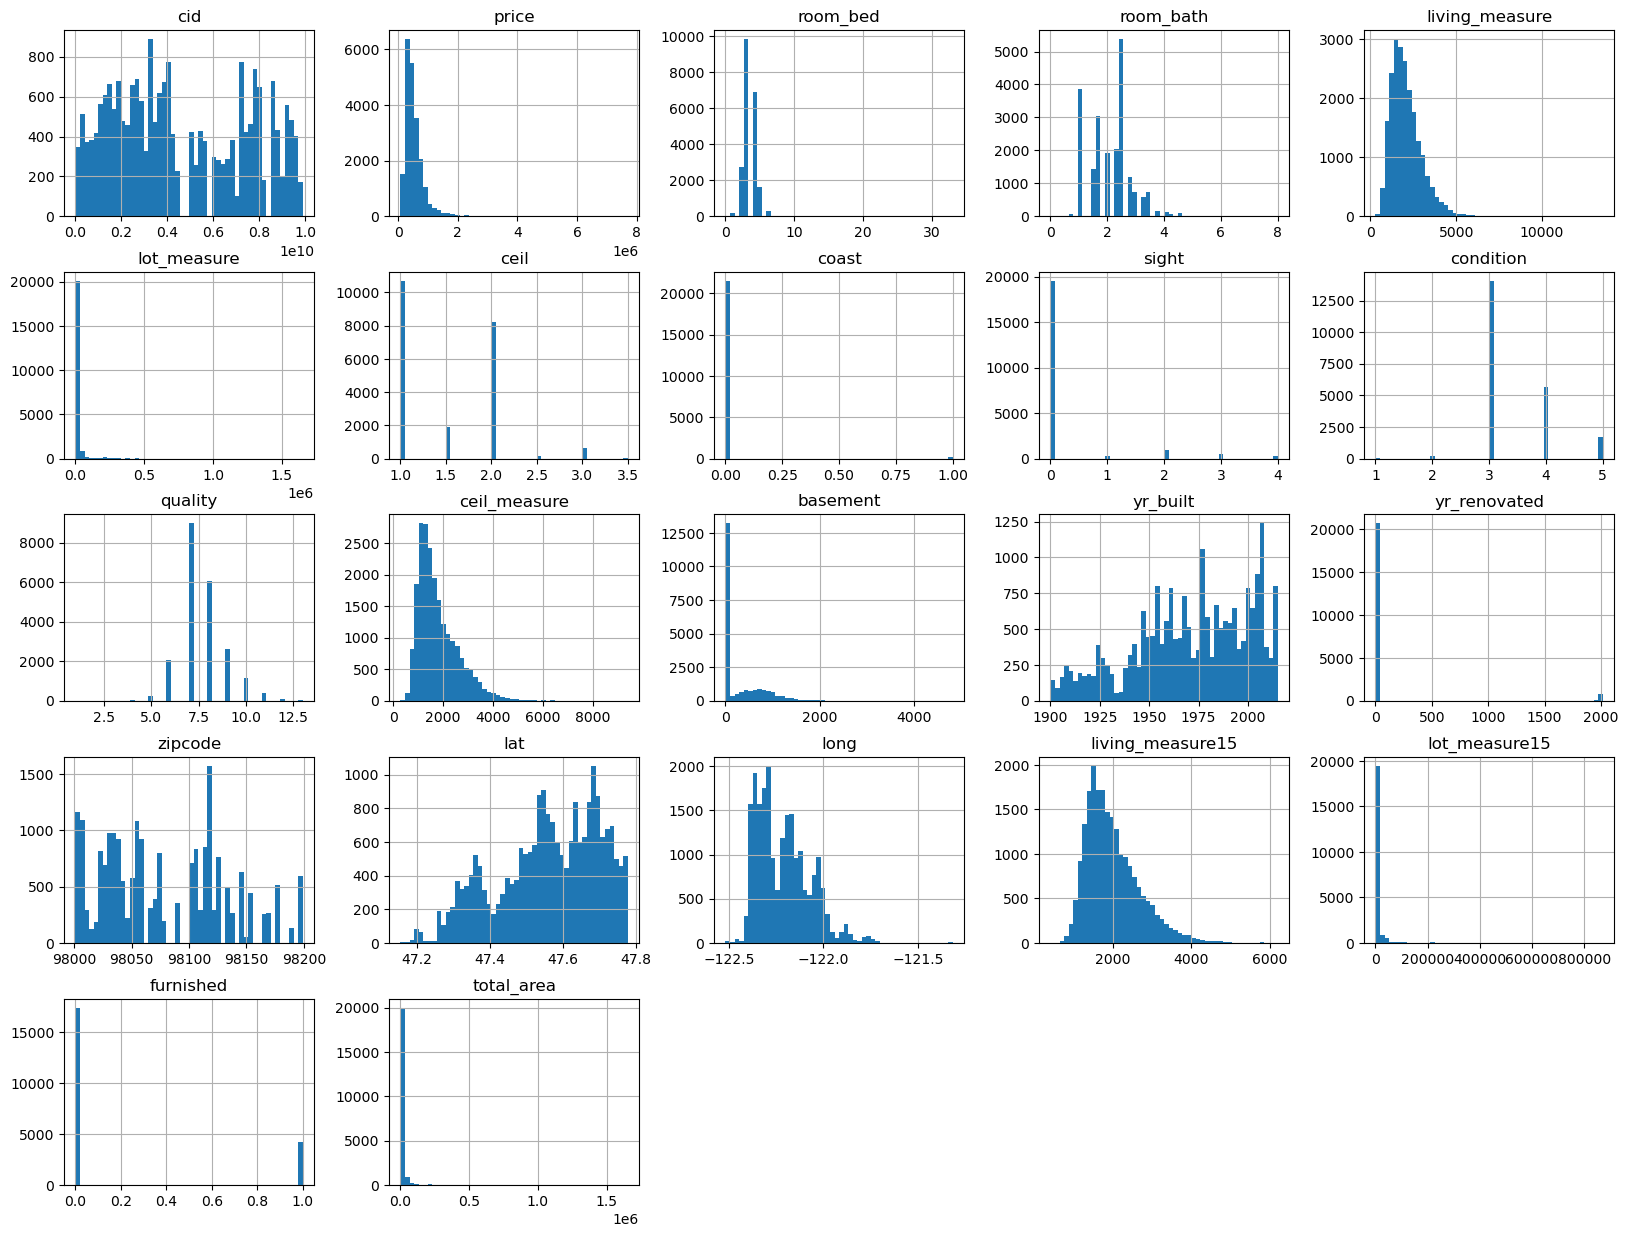

In [5]:
numeric_data = Data.select_dtypes(include=['number'])

# Plot histograms for each numeric column
numeric_data.hist(bins=50, figsize=(20, 15))
plt.show()

OBSERVATION:

* Skewness: Price, Lot Measure, Total Area, Living Measure and Ceil Measure distribution is right-skewed.
* Distribution: The histogram for yr_built shows a relatively even distribution with a slight increase in more recent years.
* Coast, Sight, Furnished status with large properties indicates the value of 0.

## 1.6 Plotting the mean,mode,median for price atrribute using histogram

Mean:  540182.1587933188 
Median:  450000.0 
Mode:  350000


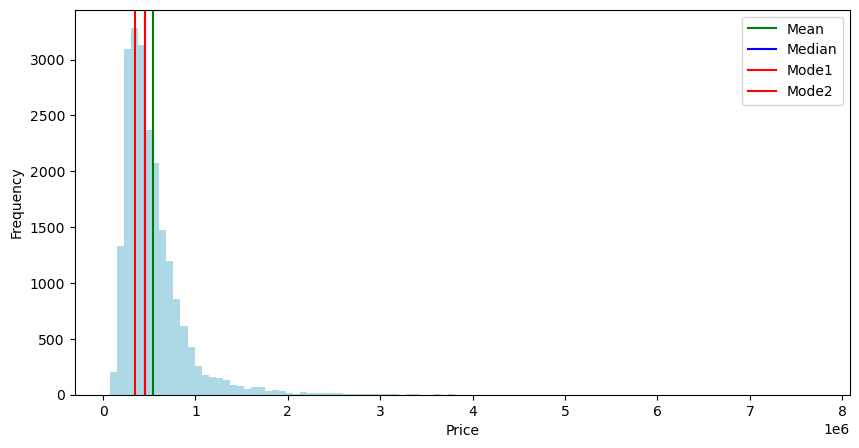

In [6]:
mean=Data['price'].mean()
median=Data['price'].median()
mode=Data['price'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Data['price'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Price')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

OBSERVATION:


*   The right skewness indicates that the property market represented by this dataset has a greater number of lower-priced properties and fewer high-priced ones




## 1.7 Check the data.describe()

In [7]:
Data.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000    21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757     2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163      918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure          ceil         coast         sight     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...      basement      yr_built  yr_renovated       zipcode  \
count  ...  21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...    291.509045   1971.005136     84.402258  98077.939805   
std    ...    442.575043     29.373411    401.679240     53.505026   
min    ...      0.000000   1900.000000      0.000000  98001.000000   
25%    ...      0.000000   1951.000000      0.000000  98033.000000   
50%    ...      0.000000   1975.000000      0.000000  98065.000000   
75%    ...    560.000000   1997.000000      0.000000  98118.000000   
max    ...   4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  living_measure15  lot_measure15  \
count  21613.000000  21613.000000      21613.000000   21613.000000   
mean      47.560053   -122.213896       1986.552492   12768.455652   
std        0.138564      0.140828        685.391304   27304.179631   
min       47.155900   -122.519000        399.000000     651.000000   
25%       47.471000   -122.328000       1490.000000    5100.000000   
50%       47.571800   -122.230000       1840.000000    7620.000000   
75%       47.678000   -122.125000       2360.000000   10083.000000   
max       47.777600   -121.315000       6210.000000  871200.000000   

          furnished    total_area  
count  21613.000000  2.161300e+04  
mean       0.196687  1.718687e+04  
std        0.397503  4.158908e+04  
min        0.000000  1.423000e+03  
25%        0.000000  7.035000e+03  
50%        0.000000  9.575000e+03  
75%        0.000000  1.300000e+04  
max        1.000000  1.652659e+06  

[8 rows x 22 columns]

OBSERVATION:


*   The histogram shows a clear right positive skew. In skewed distributions like this, most data points (in this case, property prices) are concentrated on the left (lower end), with fewer, higher values stretching out to the right.
*   Majority of properties are indeed priced on the lower end, while a smaller number of high-priced properties are driving the mean upwards.

## 1.8 Check the Measures of Dispersion:

**IQR**

In [8]:
Data.quantile(0.75,numeric_only=True) - Data.quantile(0.25,numeric_only=True)

cid                 5.185851e+09
price               3.230500e+05
room_bed            1.000000e+00
room_bath           7.500000e-01
living_measure      1.123000e+03
lot_measure         5.648000e+03
ceil                1.000000e+00
coast               0.000000e+00
sight               0.000000e+00
condition           1.000000e+00
quality             1.000000e+00
ceil_measure        1.020000e+03
basement            5.600000e+02
yr_built            4.600000e+01
yr_renovated        0.000000e+00
zipcode             8.500000e+01
lat                 2.070000e-01
long                2.030000e-01
living_measure15    8.700000e+02
lot_measure15       4.983000e+03
furnished           0.000000e+00
total_area          5.965000e+03
dtype: float64

OBSERVATION:


*   These values represent the difference between the 75th percentile and the 25th percentile (Q3 - Q1) for each numeric column in the dataset, providing a measure of statistical dispersion.
Price: The IQR for the price is $323,050. This suggests significant variability in property prices within this central range.

* Overall, significant spread observed in property prices, lot sizes, and living areas, while other features like ceiling height, geographic location, and renovation status show less variability.

**Range**

In [9]:
print(Data.max(numeric_only=True) - Data.min(numeric_only=True))

cid                 9.899000e+09
price               7.625000e+06
room_bed            3.300000e+01
room_bath           8.000000e+00
living_measure      1.325000e+04
lot_measure         1.650839e+06
ceil                2.500000e+00
coast               1.000000e+00
sight               4.000000e+00
condition           4.000000e+00
quality             1.200000e+01
ceil_measure        9.120000e+03
basement            4.820000e+03
yr_built            1.150000e+02
yr_renovated        2.015000e+03
zipcode             1.980000e+02
lat                 6.217000e-01
long                1.204000e+00
living_measure15    5.811000e+03
lot_measure15       8.705490e+05
furnished           1.000000e+00
total_area          1.651236e+06
dtype: float64


OBSERVATION:


This analysis highlights areas with significant variability (e.g., price, room counts, and lot sizes) as well as areas with more consistency (e.g., ceiling height, geographic location). The large ranges in some features suggest potential outliers or unique properties that differ significantly from the majority of the dataset.

**Variance**

In [10]:
print(Data.var(numeric_only=True))

cid                 8.274629e+18
price               1.349550e+11
room_bed            8.650150e-01
room_bath           5.931513e-01
living_measure      8.435337e+05
lot_measure         1.715659e+09
ceil                2.915880e-01
coast               7.485226e-03
sight               5.872426e-01
condition           4.234665e-01
quality             1.381703e+00
ceil_measure        6.857347e+05
basement            1.958727e+05
yr_built            8.627973e+02
yr_renovated        1.613462e+05
zipcode             2.862788e+03
lat                 1.919990e-02
long                1.983262e-02
living_measure15    4.697612e+05
lot_measure15       7.455182e+08
furnished           1.580086e-01
total_area          1.729652e+09
dtype: float64


OBSERVATION:


* Features with high variance, like price and lot_measure, are likely to include outliers and may require normalization or transformation for certain types of analysis.
* Features with low variance, such as room counts and geographic coordinates, may indicate areas of standardization where most properties share similar characteristics.

**Standard Deviation**

In [11]:
print(Data.std(numeric_only=True))

cid                 2.876566e+09
price               3.673622e+05
room_bed            9.300618e-01
room_bath           7.701632e-01
living_measure      9.184409e+02
lot_measure         4.142051e+04
ceil                5.399889e-01
coast               8.651720e-02
sight               7.663176e-01
condition           6.507430e-01
quality             1.175459e+00
ceil_measure        8.280910e+02
basement            4.425750e+02
yr_built            2.937341e+01
yr_renovated        4.016792e+02
zipcode             5.350503e+01
lat                 1.385637e-01
long                1.408283e-01
living_measure15    6.853913e+02
lot_measure15       2.730418e+04
furnished           3.975030e-01
total_area          4.158908e+04
dtype: float64


OBSERVATION:


* Features with high standard deviation (e.g., price, lot_measure, living_measure) may require scaling or transformation before applying certain machine learning models.

## 1.9 Check Covariance and Correlation

**Covariance**

In [12]:
Data.cov(numeric_only=True)

cid         price      room_bed     room_bath  \
cid               8.274629e+18 -1.775045e+13  3.441285e+06  1.143211e+07   
price            -1.775045e+13  1.349550e+11  1.053498e+05  1.485756e+05   
room_bed          3.441285e+06  1.053498e+05  8.650150e-01  3.695271e-01   
room_bath         1.143211e+07  1.485756e+05  3.695271e-01  5.931513e-01   
living_measure   -3.238447e+10  2.368699e+08  4.925960e+02  5.338120e+02   
lot_measure      -1.574060e+13  1.364223e+09  1.221324e+03  2.798944e+03   
ceil              2.877549e+07  5.093897e+04  8.810446e-02  2.082114e-01   
coast            -6.772051e+05  8.464823e+03 -5.296680e-04  4.247388e-03   
sight             2.555378e+07  1.118594e+05  5.668416e-02  1.108004e-01   
condition        -4.451878e+07  8.699795e+03  1.723221e-02 -6.263824e-02   
quality           2.749138e+07  2.882232e+05  3.902536e-01  6.020054e-01   
ceil_measure     -2.582659e+10  1.842187e+08  3.678361e+02  4.370876e+02   
basement         -6.557877e+09  5.265121e+07  1.247599e+02  9.672443e+01   
yr_built          1.806504e+09  5.825007e+05  4.212004e+00  1.144733e+01   
yr_renovated     -1.953526e+10  1.865804e+07  7.038678e+00  1.569654e+01   
zipcode          -1.265812e+09 -1.045060e+06 -7.597239e+00 -8.400840e+00   
lat              -7.537022e+05  1.562311e+04 -1.150964e-03  2.622344e-03   
long              8.425548e+06  1.115965e+03  1.695825e-02  2.419130e-02   
living_measure15 -5.719541e+09  1.473895e+08  2.496518e+02  3.001611e+02   
lot_measure15    -1.090150e+13  8.270724e+08  7.426446e+02  1.833182e+03   
furnished        -1.144500e+07  8.265025e+04  9.585195e-02  1.484553e-01   
total_area       -1.577298e+13  1.601093e+09  1.713920e+03  3.332756e+03   

                  living_measure   lot_measure          ceil          coast  \
cid                -3.238447e+10 -1.574060e+13  2.877549e+07 -677205.124699   
price               2.368699e+08  1.364223e+09  5.093897e+04    8464.822789   
room_bed            4.925960e+02  1.221324e+03  8.810446e-02      -0.000530   
room_bath           5.338120e+02  2.798944e+03  2.082114e-01       0.004247   
living_measure      8.435337e+05  6.574684e+06  1.755404e+02       8.249461   
lot_measure         6.574684e+06  1.715659e+09 -1.163286e+02      77.418670   
ceil                1.755404e+02 -1.163286e+02  2.915880e-01       0.001107   
coast               8.249461e+00  7.741867e+01  1.107146e-03       0.007485   
sight               2.003143e+02  2.371393e+03  1.218394e-02       0.026643   
condition          -3.511460e+01 -2.414616e+02 -9.268648e-02       0.000938   
quality             8.234077e+02  5.531997e+03  2.908243e-01       0.008418   
ceil_measure        6.666978e+05  6.294462e+06  2.342603e+02       5.163720   
basement            1.768358e+05  2.802218e+05 -5.871985e+01       3.085741   
yr_built            8.580238e+03  6.458085e+04  7.761250e+00      -0.066483   
yr_renovated        2.042442e+04  1.271708e+05  1.374814e+00       3.227949   
zipcode            -9.800232e+03 -2.871637e+05 -1.708121e+00       0.140191   
lat                 6.685035e+00 -4.917661e+02  3.712271e-03      -0.000171   
long                3.107108e+01  1.338837e+03  9.537583e-03      -0.000511   
living_measure15    4.761601e+05  4.105319e+06  1.035866e+02       5.127103   
lot_measure15       4.596302e+06  8.126540e+08 -1.661524e+02      72.529786   
furnished           2.310781e+02  1.957384e+03  7.464337e-02       0.002403   
total_area          7.418218e+06  1.722233e+09  5.921184e+01      85.668130   

                         sight     condition  ...      basement      yr_built  \
cid               2.555378e+07 -4.451878e+07  ... -6.557877e+09  1.806504e+09   
price             1.118594e+05  8.699795e+03  ...  5.265121e+07  5.825007e+05   
room_bed          5.668416e-02  1.723221e-02  ...  1.247599e+02  4.212004e+00   
room_bath         1.108004e-01 -6.263824e-02  ...  9.672443e+01  1.144733e+01   
living_measure    2.003143e+02 -3.511460e+01  ...  1.76

OBSERVATION:


*   **Positive Covariance:** price and living_measure have a positive covariance, meaning that as the living area increases, the price generally increases as well. living_measure and total_area also have a strong positive covariance, indicating that properties with larger living areas tend to have larger total areas.
*   **Negative Covariance:**  Negative covariance with lot_measure and living_measure15, suggests that larger properties may have lower condition ratings.
*   **Linear Covariance Relationship:** lot_measure and total_area have a large positive covariance, reflecting that they are closely related in terms of their variability. Smaller values close to zero indicate weaker relationships, such as furnished and lot_measure.

**Correlation**

In [13]:
Data.corr(numeric_only=True)

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001286   0.005160       -0.012258   
price            -0.016797  1.000000  0.308338   0.525134        0.702044   
room_bed          0.001286  0.308338  1.000000   0.515884        0.576671   
room_bath         0.005160  0.525134  0.515884   1.000000        0.754665   
living_measure   -0.012258  0.702044  0.576671   0.754665        1.000000   
lot_measure      -0.132109  0.089655  0.031703   0.087740        0.172826   
ceil              0.018525  0.256786  0.175429   0.500653        0.353949   
coast            -0.002721  0.266331 -0.006582   0.063744        0.103818   
sight             0.011592  0.397346  0.079532   0.187737        0.284611   
condition        -0.023783  0.036392  0.028472  -0.124982       -0.058753   
quality           0.008130  0.667463  0.356967   0.664983        0.762704   
ceil_measure     -0.010842  0.605566  0.477600   0.685342        0.876597   
basement         -0.005151  0.323837  0.303093   0.283770        0.435043   
yr_built          0.021380  0.053982  0.154178   0.506019        0.318049   
yr_renovated     -0.016907  0.126442  0.018841   0.050739        0.055363   
zipcode          -0.008224 -0.053168 -0.152668  -0.203866       -0.199430   
lat              -0.001891  0.306919 -0.008931   0.024573        0.052529   
long              0.020799  0.021571  0.129473   0.223042        0.240223   
living_measure15 -0.002901  0.585374  0.391638   0.568634        0.756420   
lot_measure15    -0.138798  0.082456  0.029244   0.087175        0.183286   
furnished        -0.010009  0.565991  0.259268   0.484923        0.632947   
total_area       -0.131844  0.104796  0.044310   0.104050        0.194209   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.132109  0.018525 -0.002721  0.011592  -0.023783  ...   
price                0.089655  0.256786  0.266331  0.397346   0.036392  ...   
room_bed             0.031703  0.175429 -0.006582  0.079532   0.028472  ...   
room_bath            0.087740  0.500653  0.063744  0.187737  -0.124982  ...   
living_measure       0.172826  0.353949  0.103818  0.284611  -0.058753  ...   
lot_measure          1.000000 -0.005201  0.021604  0.074710  -0.008958  ...   
ceil                -0.005201  1.000000  0.023698  0.029444  -0.263768  ...   
coast                0.021604  0.023698  1.000000  0.401857   0.016653  ...   
sight                0.074710  0.029444  0.401857  1.000000   0.045990  ...   
condition           -0.008958 -0.263768  0.016653  0.045990   1.000000  ...   
quality              0.113621  0.458183  0.082775  0.251321  -0.144674  ...   
ceil_measure         0.183512  0.523885  0.072075  0.167649  -0.158214  ...   
basement             0.015286 -0.245705  0.080588  0.276947   0.174105  ...   
yr_built             0.053080  0.489319 -0.026161 -0.053440  -0.361417  ...   
yr_renovated         0.007644  0.006338  0.092885  0.103917  -0.060618  ...   
zipcode             -0.129574 -0.059121  0.030285  0.084827   0.003026  ...   
lat                 -0.085683  0.049614 -0.014274  0.006157  -0.014941  ...   
long                 0.229521  0.125419 -0.041910 -0.078400  -0.106500  ...   
living_measure15     0.144608  0.279885  0.086463  0.280439  -0.092824  ...   
lot_measure15        0.718557 -0.011269  0.030703  0.072575  -0.003406  ...   
furnished            0.118883  0.347749  0.069882  0.220250  -0.121902  ...   
total_area           0.999763  0.002637  0.023809  0.080693  -0.010219  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price             0.323837  0.053982      0.126442 -0.053168  0.306919   
room_bed          0.303093  0.154178      0.018841 -0.152668 -0.008931   
room_bath         0.283770  0.506019      0.050739 -0.203866  0.024573   
living_measure    0.435043  0.318049      0.055363 -0.199430  0

OBSERVATION:


*   Feature Selection: Strongly correlated features (like living_measure and ceil_measure) might be redundant.
*   Features with high positive correlations such as living measure  and quality with the target variable (price) are likely important predictors.

## 1.10 Correlation Analysis

### 1.10 a) Pairplot for checking the correlation

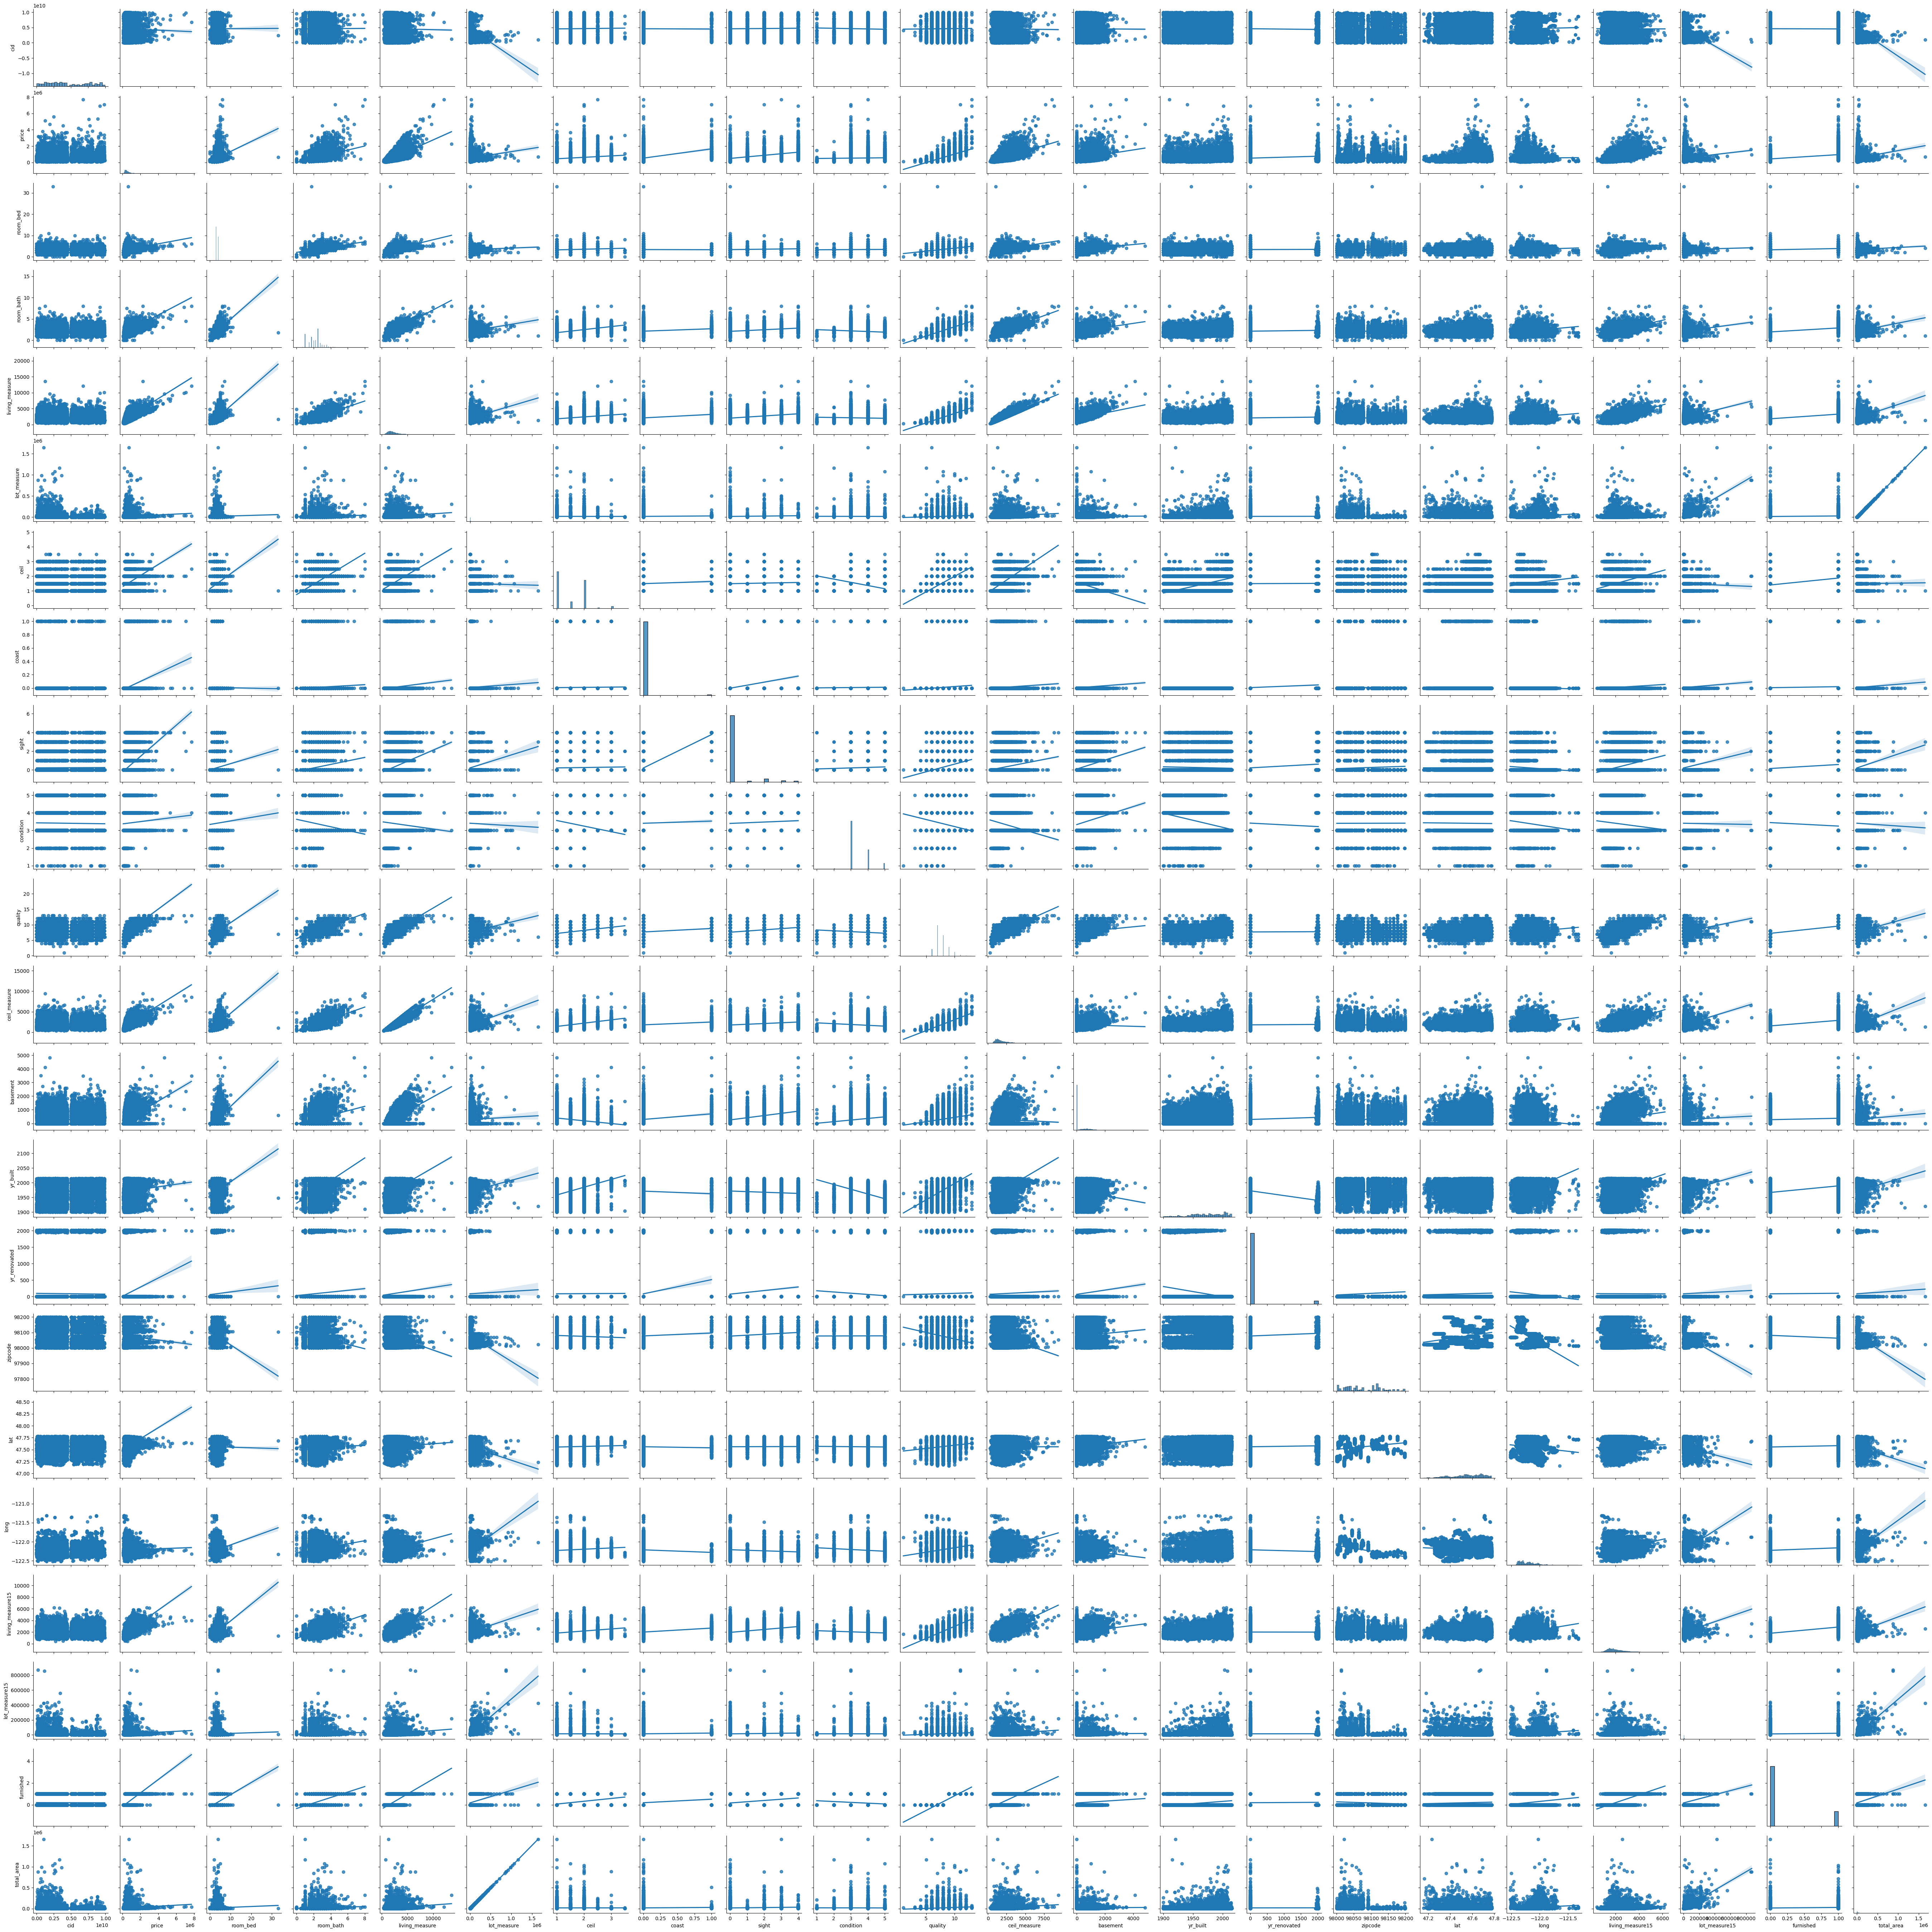

In [14]:
import seaborn as sns

sns.pairplot(Data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

OBSERVATION:

* Price Correlations: Price has a strong positive correlation with living_measure, quality, and ceil_measure, indicating that larger and higher-quality properties are generally more expensive.
* Distribution Insights: Most variables like price and lot_measure show a right-skewed distribution, suggesting that a few high-value properties may be pulling the averages up.
* Potential Multicollinearity: There’s a high correlation between living_measure and ceil_measure, which could suggest multicollinearity.

### 1.10 b) Heatmap For checking the correlation

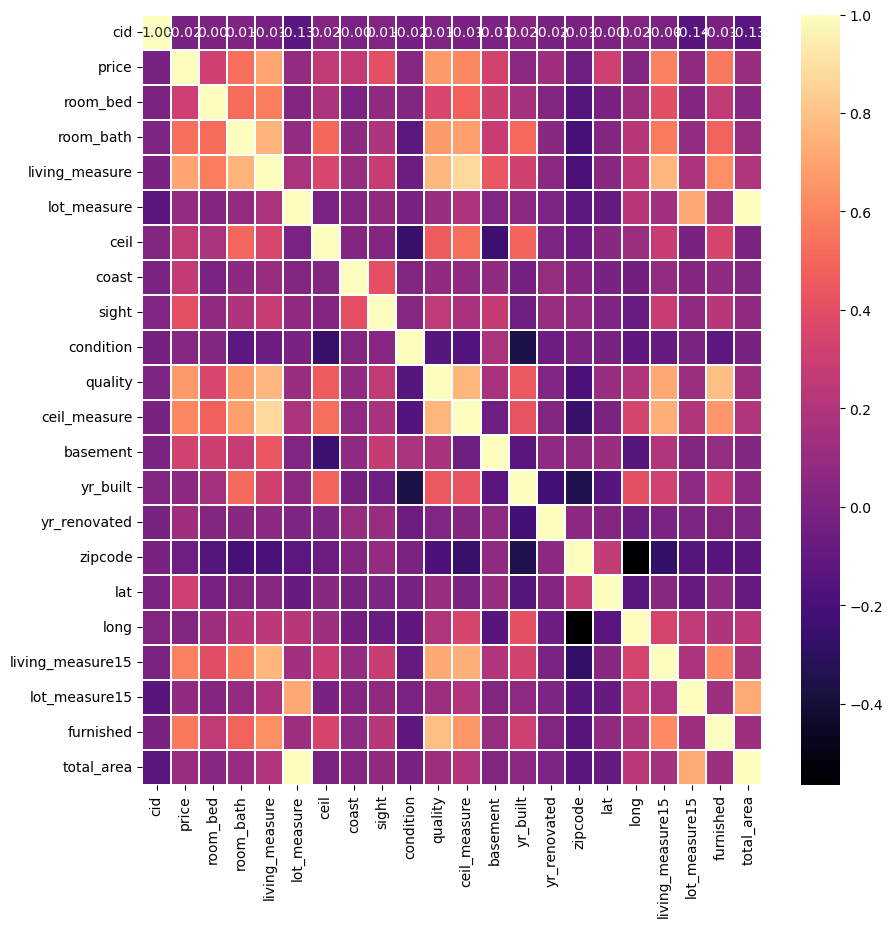

In [15]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Data.corr(numeric_only=True), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on
plt.show()

OBSERVATION:

* Feature Importance: Variables like living_measure, quality, and ceil_measure are highly correlated with the target variable price.
* Multicollinearity: The strong correlations between living_measure and ceil_measure could be an issue in linear models.
* Variables with low or no correlation with the target variable (price), like zipcode or condition, might be less useful for predictive modeling.

## 1.11. Visualization of Distribution and Outliers for All Numeric Columns in a DataFrame

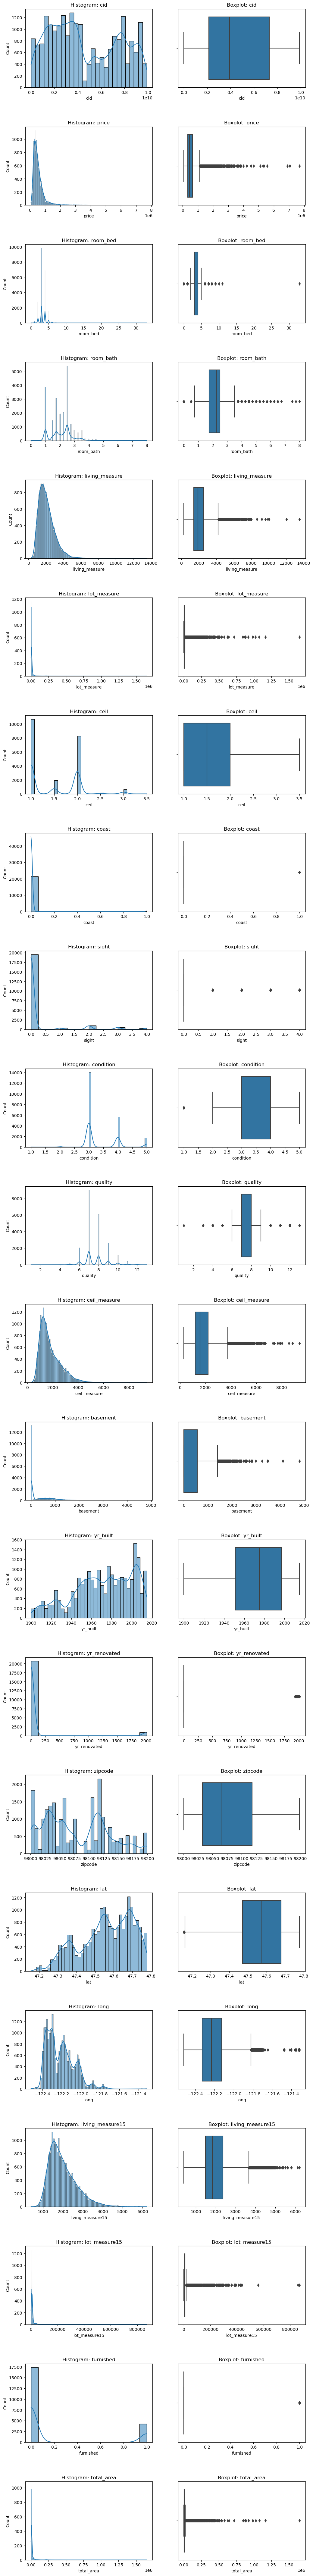

In [16]:
# Get numeric columns from the DataFrame
num_cols = Data.select_dtypes(include=['number']).columns.tolist()

# Number of numeric columns
num_cols_count = len(num_cols)

# Create subplots
fig, axes = plt.subplots(num_cols_count, 2, figsize=(12, num_cols_count * 5))

# Adjust layout
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(Data[col].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title('Histogram: ' + col)

    # Boxplot
    sns.boxplot(x=Data[col].dropna(), ax=axes[i, 1], orient='h')
    axes[i, 1].set_title('Boxplot: ' + col)

# Show plot
plt.show()


OBSERVATION:

- Price:

The price distribution is right-skewed, with most properties priced at the lower end.
The boxplot confirms the presence of many outliers at the higher end, indicating a few very expensive properties.

- Rooms, Beds, Baths:

The distributions of rooms, beds, and baths show that most properties have a standard number of each, with peaks around common values (e.g., 2-3 rooms, 1-2 baths).
The boxplots for these variables show some outliers, especially in the number of baths, indicating that a few properties have an unusually high number of these features.

- Living and Lot Areas:

Both living area and lot area distributions are right-skewed, indicating most properties have smaller areas, but a few have significantly larger sizes.
The boxplots show a substantial number of outliers, particularly in the lot area, reflecting the variability in property sizes.

- Year Built, Year Renovated:

The distribution for the year built suggests that a majority of properties were constructed in certain periods (likely between 1940 and 1980).
Year renovated is highly right-skewed, with most properties not having undergone renovations (or very few did).
The boxplot for the year renovated shows a wide range of outliers, indicating some properties have been renovated recently while others have not.

- Other Variables:

Variables like condition, grade, and quality ratings also display right-skewed distributions.
The condition and grade boxplots have outliers, but the median and interquartile range suggest most properties fall into average conditions.
Categorical Variables (e.g., Water View, Waterfront, etc.):

These variables seem to have a few distinct peaks (e.g., properties with and without a view), showing a binary or near-binary distribution.
The boxplots also reflect this, with a majority of properties clustered at one end of the spectrum.

Summary:

The data shows a high degree of skewness in many of the numeric variables, indicating the presence of a few extreme values.
Outliers are prevalent, especially in price, living area, and lot area, reflecting diversity in the dataset (e.g., luxury properties vs. average homes).

The overall distribution of categorical variables shows that most properties do not possess high-end features like waterfront views or superior conditions, which aligns with the skewed nature of the dataset.
If this dataset is indeed about real estate, these insights suggest a market with a wide range of property types, from standard homes to luxury estates.

## 1.12 Check Missing Values

In [17]:
Data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

OBSERVATION: No missing values captured in the dataset.

## 1.13 Finding Average price value according to the zipcode

In [18]:
# Show all unique values in the 'zipcode' column
unique_values = Data['zipcode'].unique()
print("Unique values in 'zipcode':", unique_values)

Unique values in 'zipcode': [98133 98023 98038 98115 98059 98028 98119 98003 98117 98092 98053 98166
 98011 98058 98178 98144 98031 98125 98103 98004 98056 98122 98006 98074
 98106 98034 98001 98075 98107 98002 98027 98126 98022 98055 98188 98198
 98136 98146 98052 98014 98116 98168 98010 98033 98005 98042 98045 98008
 98065 98105 98118 98032 98077 98199 98040 98155 98177 98112 98007 98029
 98019 98030 98039 98148 98072 98070 98108 98109 98102 98024]


In [19]:
zipcode_counts = Data.groupby('zipcode').size()
print("Count of Unique zipcode:")
print(zipcode_counts)

Count of Unique zipcode:
zipcode
98001    362
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Length: 70, dtype: int64


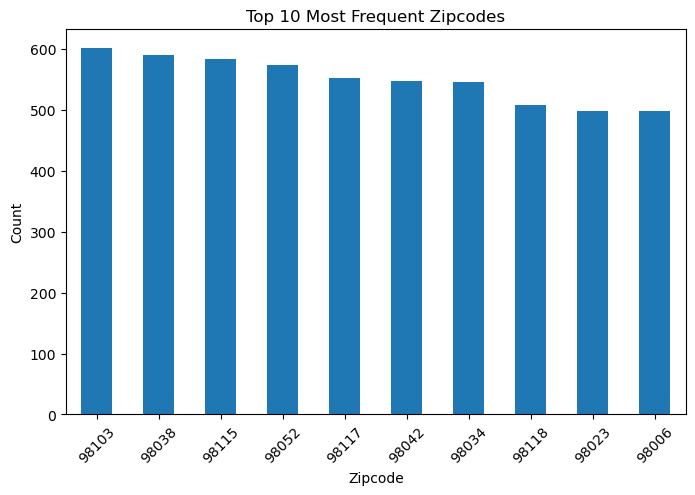

In [20]:
# Group the data and sort by count, then select the top 10 values
top_n = 10
top_zipcodes = Data.groupby('zipcode').size().nlargest(top_n)

# Plotting the data
plt.figure(figsize=(8, 5))
top_zipcodes.plot(kind='bar')

# Adding titles and labels
plt.title(f'Top {top_n} Most Frequent Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

OBSERVATION:

*   Affordable or Mid-Range Housing: Zip codes like 98103, 98038, and 98115 are highly frequent in the dataset but do not appear among the top 10 highest average prices. This suggests these areas may offer more affordable or mid-range housing, attracting a higher number of transactions or listings due to accessibility or diversity in property types.

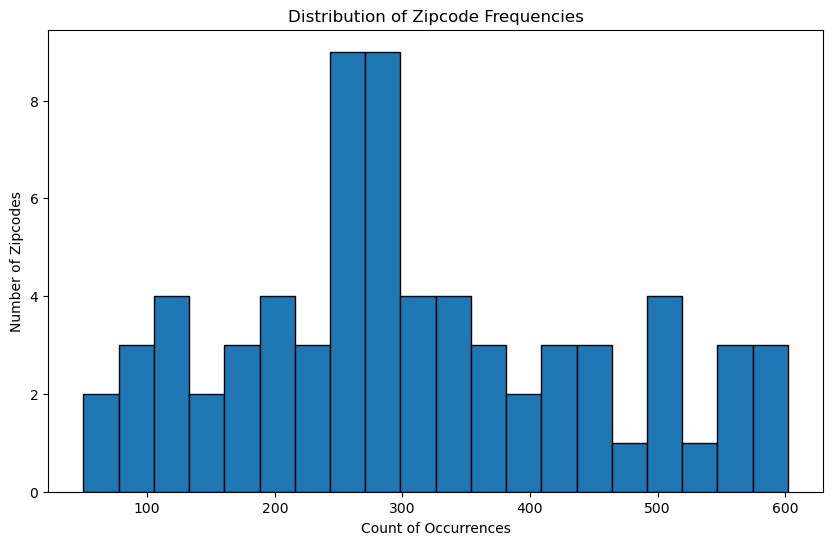

In [21]:
# Group the data and count occurrences
zipcode_counts = Data.groupby('zipcode').size()

# Plotting a histogram of the counts
plt.figure(figsize=(10, 6))
plt.hist(zipcode_counts, bins=20, edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Zipcode Frequencies')
plt.xlabel('Count of Occurrences')
plt.ylabel('Number of Zipcodes')

# Show the plot
plt.show()

In [22]:
# Calculate the average price for each zipcode
average_price_per_zipcode = Data.groupby('zipcode')['price'].mean()

# Display the result
print(average_price_per_zipcode)


zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.356524e+06
98005    8.102897e+05
             ...     
98177    6.764194e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028967e+05
98199    7.921879e+05
Name: price, Length: 70, dtype: float64


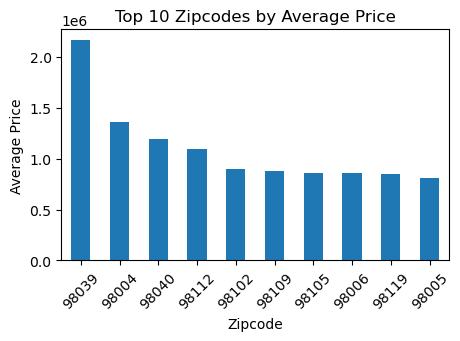

In [23]:
# Calculate the average price for each zipcode and sort in descending order to get the highest prices first
average_price_per_zipcode = Data.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Select the top 10 zipcodes with the highest average prices
top_10_zipcodes = average_price_per_zipcode.head(10)

# Plotting the data
plt.figure(figsize=(5,3))
top_10_zipcodes.plot(kind='bar')

# Adding titles and labels
plt.title('Top 10 Zipcodes by Average Price')
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

OBSERVATION:

*   Luxury Housing: On the other hand, zip codes like 98039, 98004, and 98040 are less frequent but dominate the top average price list. These areas likely represent luxury markets where fewer transactions occur, but the properties are significantly more expensive.





# 2. DATA PREPROCESSING

## 2.1. Extract property sold year

In [24]:
# Extract property sold year
Data['dayhours'] = pd.to_datetime(Data['dayhours'], format='%Y%m%dT%H%M%S')
Data['yr_sold'] = Data['dayhours'].dt.year

In [25]:
Data.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4       3.25            3020   
1  8731981640 2014-12-04  277500         4       2.50            2550   
2  5104530220 2015-04-20  404000         3       2.50            2370   
3  6145600285 2014-05-29  300000         2       1.00             820   
4  8924100111 2015-04-24  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
0        13457   1.0      0      0  ...      1956             0    98133   
1         7500   1.0      0      0  ...      1976             0    98023   
2         4324   2.0      0      0  ...      2006             0    98038   
3         3844   1.0      0      0  ...      1916             0    98133   
4         4050   1.0      0      0  ...      1954             0    98115   

       lat     long  living_measure15  lot_measure15  furnished  total_area  \
0  47.7174 -122.336              2120           7553          1       16477   
1  47.3165 -122.386              2260           8800          0       10050   
2  47.3515 -121.999              2370           4348          0        6694   
3  47.7049 -122.349              1520           3844          0        4664   
4  47.6768 -122.269              1900           5940          0        5450   

   yr_sold  
0     2014  
1     2014  
2     2015  
3     2014  
4     2015  

[5 rows x 24 columns]

In [26]:
# Calculate the Age of a building'

Data['bldg_age'] = Data['yr_sold'] - Data['yr_built']
Data.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4       3.25            3020   
1  8731981640 2014-12-04  277500         4       2.50            2550   
2  5104530220 2015-04-20  404000         3       2.50            2370   
3  6145600285 2014-05-29  300000         2       1.00             820   
4  8924100111 2015-04-24  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  yr_renovated  zipcode      lat  \
0        13457   1.0      0      0  ...             0    98133  47.7174   
1         7500   1.0      0      0  ...             0    98023  47.3165   
2         4324   2.0      0      0  ...             0    98038  47.3515   
3         3844   1.0      0      0  ...             0    98133  47.7049   
4         4050   1.0      0      0  ...             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  yr_sold  \
0 -122.336              2120           7553          1       16477     2014   
1 -122.386              2260           8800          0       10050     2014   
2 -121.999              2370           4348          0        6694     2015   
3 -122.349              1520           3844          0        4664     2014   
4 -122.269              1900           5940          0        5450     2015   

   bldg_age  
0        58  
1        38  
2         9  
3        98  
4        61  

[5 rows x 25 columns]

## 2.2. Drop cid column

In [27]:
# Drop cid column

Data = Data.drop(columns=['cid'])
Data.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0 2014-11-07  808100         4       3.25            3020        13457   1.0   
1 2014-12-04  277500         4       2.50            2550         7500   1.0   
2 2015-04-20  404000         3       2.50            2370         4324   2.0   
3 2014-05-29  300000         2       1.00             820         3844   1.0   
4 2015-04-24  699000         2       1.50            1400         4050   1.0   

   coast  sight  condition  ...  yr_renovated  zipcode      lat     long  \
0      0      0          5  ...             0    98133  47.7174 -122.336   
1      0      0          3  ...             0    98023  47.3165 -122.386   
2      0      0          3  ...             0    98038  47.3515 -121.999   
3      0      0          4  ...             0    98133  47.7049 -122.349   
4      0      0          4  ...             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  yr_sold  bldg_age  
0              2120           7553          1       16477     2014        58  
1              2260           8800          0       10050     2014        38  
2              2370           4348          0        6694     2015         9  
3              1520           3844          0        4664     2014        98  
4              1900           5940          0        5450     2015        61  

[5 rows x 24 columns]

## 2.3. Drop dayhours column

In [28]:
# Drop dayhours column

Data = Data.drop(columns=['dayhours'])
Data.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  yr_renovated  zipcode      lat     long  \
0      0          5        9  ...             0    98133  47.7174 -122.336   
1      0          3        8  ...             0    98023  47.3165 -122.386   
2      0          3        8  ...             0    98038  47.3515 -121.999   
3      0          4        6  ...             0    98133  47.7049 -122.349   
4      0          4        8  ...             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  yr_sold  bldg_age  
0              2120           7553          1       16477     2014        58  
1              2260           8800          0       10050     2014        38  
2              2370           4348          0        6694     2015         9  
3              1520           3844          0        4664     2014        98  
4              1900           5940          0        5450     2015        61  

[5 rows x 23 columns]

## 2.4. Calculate renovation_gap of property

In [29]:
# Calculating the renovation_gap of property
Data['renovation_gap'] = Data.apply(lambda row: row['yr_sold'] - row['yr_renovated'] if row['yr_renovated'] != 0 else row['yr_sold'] - row['yr_built'], axis=1)
# Drop the 'yr_renovated' column in-place
Data.drop('yr_renovated', axis=1, inplace=True)
Data.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  zipcode      lat     long  \
0      0          5        9  ...    98133  47.7174 -122.336   
1      0          3        8  ...    98023  47.3165 -122.386   
2      0          3        8  ...    98038  47.3515 -121.999   
3      0          4        6  ...    98133  47.7049 -122.349   
4      0          4        8  ...    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  yr_sold  bldg_age  \
0              2120           7553          1       16477     2014        58   
1              2260           8800          0       10050     2014        38   
2              2370           4348          0        6694     2015         9   
3              1520           3844          0        4664     2014        98   
4              1900           5940          0        5450     2015        61   

   renovation_gap  
0            58.0  
1            38.0  
2             9.0  
3            98.0  
4            61.0  

[5 rows x 23 columns]

## 2.5. Calculate the average price for each zipcode and rank those properties

In [30]:
# Step 1: Calculate the average price for each zipcode
zipcode_avg_price = Data.groupby('zipcode')['price'].mean().reset_index()

# Step 2: Create a new 'rank' column based on the average price for each zipcode (higher price = higher rank)
zipcode_avg_price['rank'] = zipcode_avg_price['price'].rank(ascending=False)

# Step 3: Merge only the 'rank' column back to the original dataframe, not the average price
Data = pd.merge(Data, zipcode_avg_price[['zipcode', 'rank']], on='zipcode', how='left')

# Display the updated dataframe with only the 'rank' column added
Data.head()


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...      lat     long  living_measure15  \
0      0          5        9  ...  47.7174 -122.336              2120   
1      0          3        8  ...  47.3165 -122.386              2260   
2      0          3        8  ...  47.3515 -121.999              2370   
3      0          4        6  ...  47.7049 -122.349              1520   
4      0          4        8  ...  47.6768 -122.269              1900   

   lot_measure15  furnished  total_area  yr_sold  bldg_age  renovation_gap  \
0           7553          1       16477     2014        58            58.0   
1           8800          0       10050     2014        38            38.0   
2           4348          0        6694     2015         9             9.0   
3           3844          0        4664     2014        98            98.0   
4           5940          0        5450     2015        61            61.0   

   rank  
0  49.0  
1  65.0  
2  50.0  
3  49.0  
4  21.0  

[5 rows x 24 columns]

In [31]:
Data.drop('zipcode', axis=1, inplace=True)
Data.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...      lat     long  living_measure15  \
0      0          5        9  ...  47.7174 -122.336              2120   
1      0          3        8  ...  47.3165 -122.386              2260   
2      0          3        8  ...  47.3515 -121.999              2370   
3      0          4        6  ...  47.7049 -122.349              1520   
4      0          4        8  ...  47.6768 -122.269              1900   

   lot_measure15  furnished  total_area  yr_sold  bldg_age  renovation_gap  \
0           7553          1       16477     2014        58            58.0   
1           8800          0       10050     2014        38            38.0   
2           4348          0        6694     2015         9             9.0   
3           3844          0        4664     2014        98            98.0   
4           5940          0        5450     2015        61            61.0   

   rank  
0  49.0  
1  65.0  
2  50.0  
3  49.0  
4  21.0  

[5 rows x 23 columns]

## 2.6.	Data Transformation Techniques

**Log Transformation**

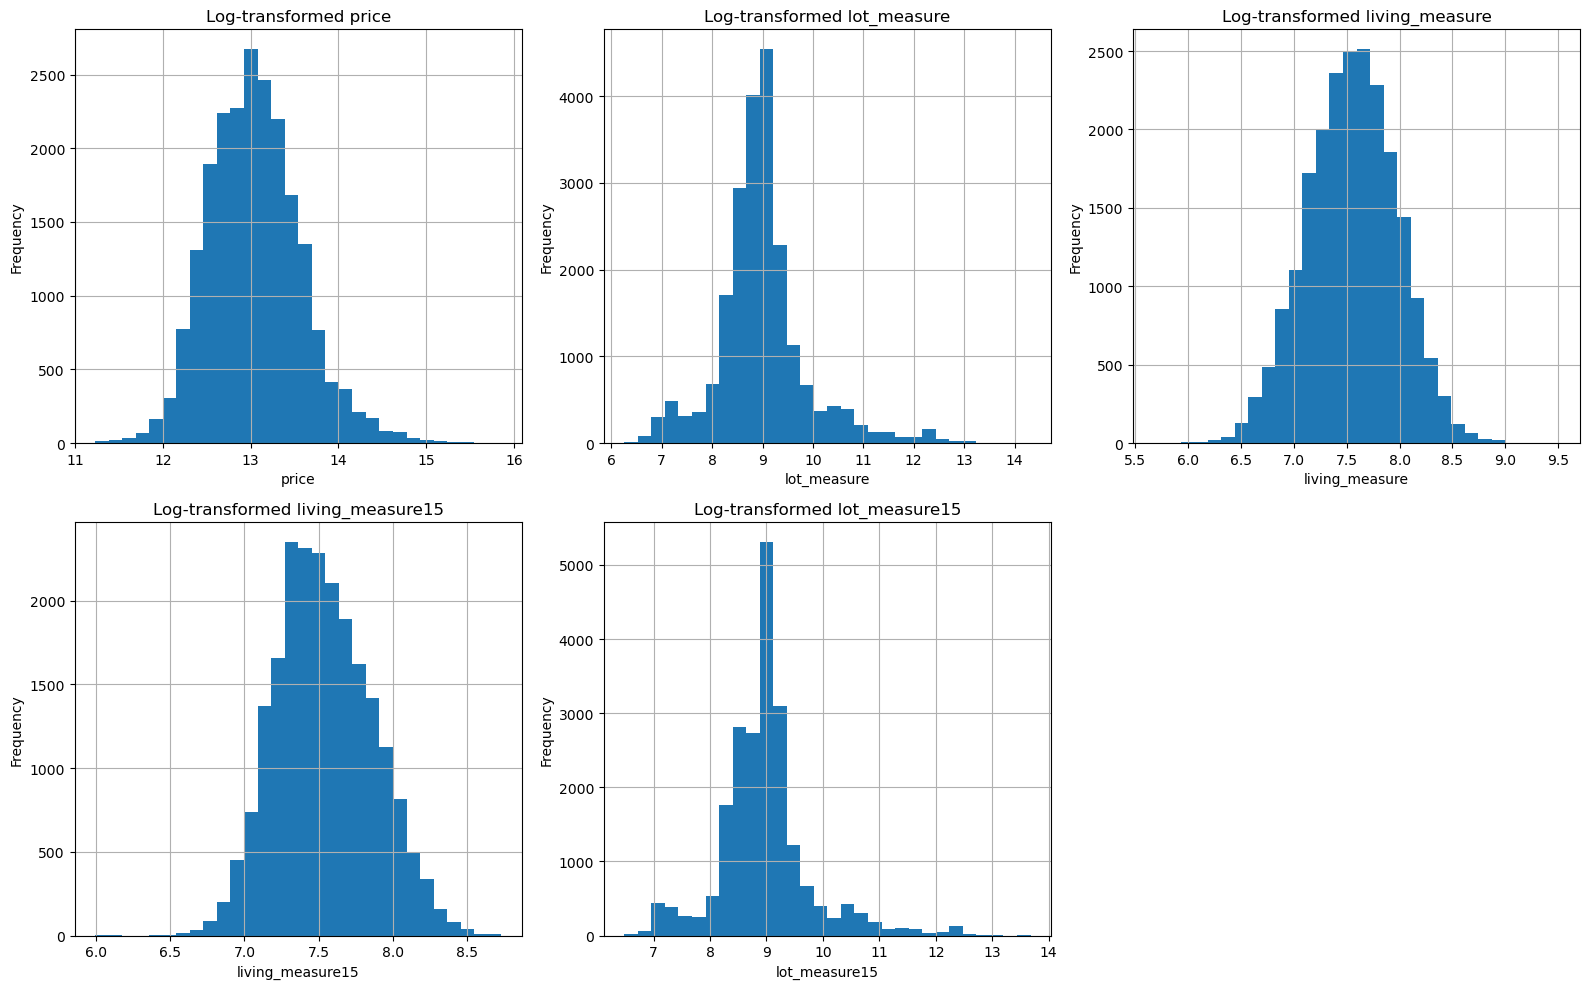

In [32]:
# Applying log transformation to skewed columns
skewed_columns = ['price', 'lot_measure', 'living_measure', 'living_measure15', 'lot_measure15']

# Applying log1p transformation (log(1 + x)) to handle zero or negative values if any
for col in skewed_columns:
    Data[col] = np.log1p(Data[col])

# Plotting the transformed distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(skewed_columns):
    Data[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(f"Log-transformed {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Removing any unused axes
for i in range(len(skewed_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Standardisation**

In [33]:
#Feature Scaling

# Re-import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
scaled_features = scaler.fit_transform(Data)

In [34]:
scaled_features

array([[ 1.05266644,  0.67648506,  1.47406291, ...,  0.49982214,
         0.59220066,  0.7069207 ],
       [-0.97627239,  0.67648506,  0.50022075, ..., -0.18103325,
        -0.10193102,  1.5487066 ],
       [-0.26331367, -0.39873715,  0.50022075, ..., -1.16827357,
        -1.10842196,  0.75953232],
       ...,
       [ 0.07749095,  0.67648506,  0.8248348 , ..., -1.4746585 ,
        -1.42078122,  0.33863937],
       [-0.45601601, -1.47395936, -0.14900736, ..., -0.48741818,
        -0.41429028, -0.24008843],
       [-0.50901503, -0.39873715, -1.44746357, ...,  0.7721643 ,
         0.86985334,  0.1281929 ]])

In [35]:
# Convert the scaled features back to a DataFrame with appropriate column names
scaled_data = pd.DataFrame(scaled_features, columns=Data.columns)


scaled_data.head()

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  1.052666  0.676485   1.474063        1.089227     0.573218 -0.915427   
1 -0.976272  0.676485   0.500221        0.690919    -0.074637 -0.915427   
2 -0.263314 -0.398737   0.500221        0.518563    -0.684904  0.936506   
3 -0.828285 -1.473959  -1.447464       -1.979471    -0.815285 -0.915427   
4  0.777358 -1.473959  -0.798235       -0.720687    -0.757442 -0.915427   

      coast     sight  condition   quality  ...       lat      long  \
0 -0.087173 -0.305759   2.444294  1.142667  ...  1.135587 -0.867059   
1 -0.087173 -0.305759  -0.629187  0.291916  ... -1.757734 -1.222109   
2 -0.087173 -0.305759  -0.629187  0.291916  ... -1.505137  1.525981   
3 -0.087173 -0.305759   0.907554 -1.409587  ...  1.045374 -0.959372   
4 -0.087173 -0.305759   0.907554  0.291916  ...  0.842574 -0.391291   

   living_measure15  lot_measure15  furnished  total_area   yr_sold  bldg_age  \
0          0.365510      -0.038532   2.020944   -0.017069 -0.690655  0.499822   
1          0.560786       0.149421  -0.494818   -0.171608 -0.690655 -0.181033   
2          0.705913      -0.717737  -0.494818   -0.252304  1.447901 -1.168274   
3         -0.650344      -0.869258  -0.494818   -0.301116 -0.690655  1.861533   
4          0.030962      -0.334014  -0.494818   -0.282217  1.447901  0.601950   

   renovation_gap      rank  
0        0.592201  0.706921  
1       -0.101931  1.548707  
2       -1.108422  0.759532  
3        1.980464  0.706921  
4        0.696320 -0.766205  

[5 rows x 23 columns]

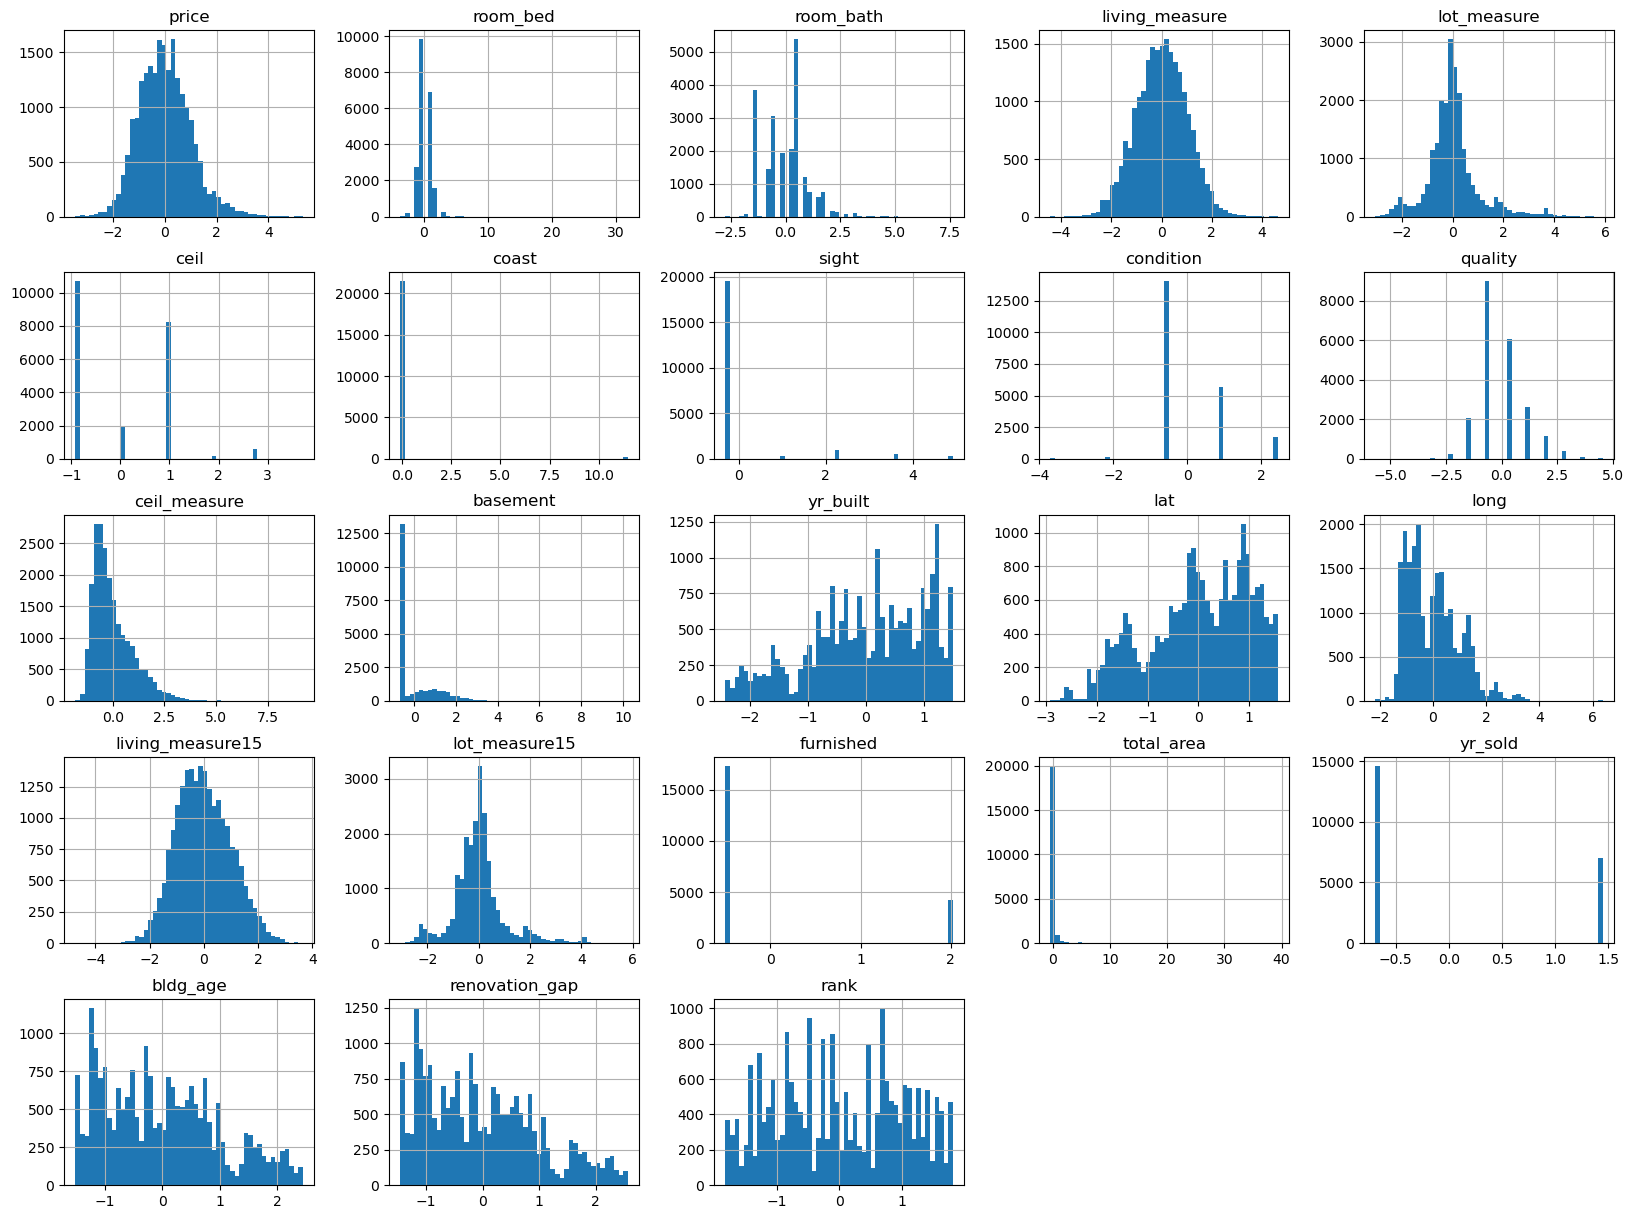

In [36]:
#check the distribution of the data

numeric_data = scaled_data.select_dtypes(include=['number'])

# Plot histograms for each numeric column
numeric_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [37]:
scaled_data.to_csv('scaled_data.csv')

# 3. Methodology/Modelling

## 3.1. Select Best Clustering Algorithm

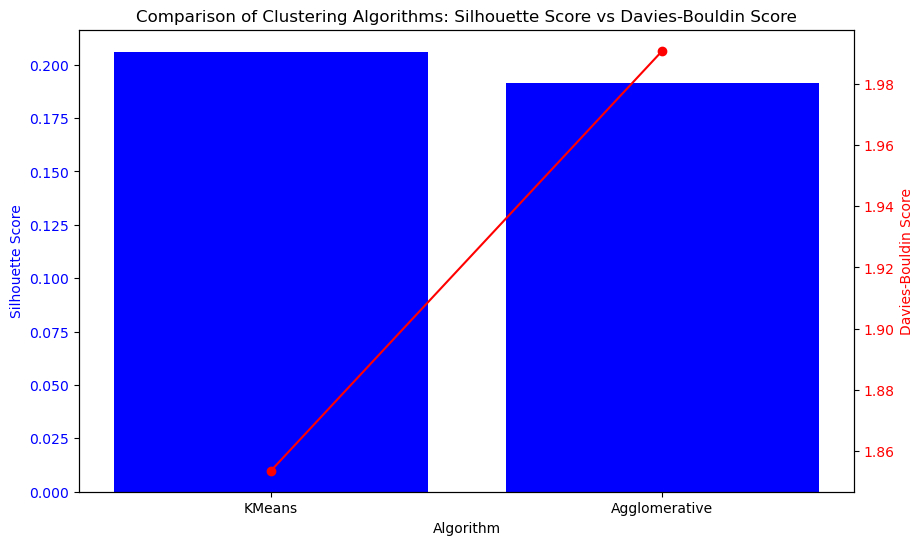

The best algorithm is KMeans with a Silhouette Score of 0.20606979914882376, Davies-Bouldin Score of 1.8535206176933543, and 2.0 clusters.


In [38]:
# Necessary imports for clustering and metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

# Dropping the 'price' column for clustering
X = scaled_data.drop(columns=['price'])  # Clustering doesn't involve the target variable 'price'

# Initializing the best scores dictionary to store the results of different algorithms
best_scores = {
    'KMeans': {'n_clusters': None, 'silhouette': -1, 'davies_bouldin': float('inf')},
    'Agglomerative': {'n_clusters': None, 'silhouette': -1, 'davies_bouldin': float('inf')},
}

# Parameter ranges for the algorithms
n_clusters_range = [2, 3, 4, 5]
#gmm_components_range = [2, 3, 4, 5]

# Step 1: Test different parameters for KMeans
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_db_score = davies_bouldin_score(X, kmeans_labels)

    if kmeans_silhouette > best_scores['KMeans']['silhouette']:
        best_scores['KMeans'] = {'n_clusters': n_clusters, 'silhouette': kmeans_silhouette, 'davies_bouldin': kmeans_db_score}

# Step 2: Test different parameters for Agglomerative Clustering
for n_clusters in n_clusters_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X)
    agglo_silhouette = silhouette_score(X, agglo_labels)
    agglo_db_score = davies_bouldin_score(X, agglo_labels)

    if agglo_silhouette > best_scores['Agglomerative']['silhouette']:
        best_scores['Agglomerative'] = {'n_clusters': n_clusters, 'silhouette': agglo_silhouette, 'davies_bouldin': agglo_db_score}


# Convert best_scores into a DataFrame
best_scores_df = pd.DataFrame(best_scores).T

# Plotting the results dynamically
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Silhouette Score
ax1.bar(best_scores_df.index, best_scores_df['silhouette'], color='blue', label='Silhouette Score')
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Silhouette Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary axis for Davies-Bouldin Score
ax2 = ax1.twinx()
ax2.plot(best_scores_df.index, best_scores_df['davies_bouldin'], color='red', marker='o', label='Davies-Bouldin Score')
ax2.set_ylabel('Davies-Bouldin Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Clustering Algorithms: Silhouette Score vs Davies-Bouldin Score')

# Identify the best algorithm based on the Silhouette Score
best_algorithm = best_scores_df['silhouette'].idxmax()
best_silhouette = best_scores_df['silhouette'].max()
best_davies_bouldin = best_scores_df.loc[best_algorithm, 'davies_bouldin']
best_clusters = best_scores_df.loc[best_algorithm, 'n_clusters'] if 'n_clusters' in best_scores_df.loc[best_algorithm] else best_scores_df.loc[best_algorithm, 'n_components']

plt.show()

# Output the best algorithm along with cluster information
print(f"The best algorithm is {best_algorithm} with a Silhouette Score of {best_silhouette}, Davies-Bouldin Score of {best_davies_bouldin}, and {best_clusters} clusters.")


## 3.2. Apply Linear Regression Model

Cluster 0 - MSE: 0.12391567577322037, R²: 0.8684467102256541


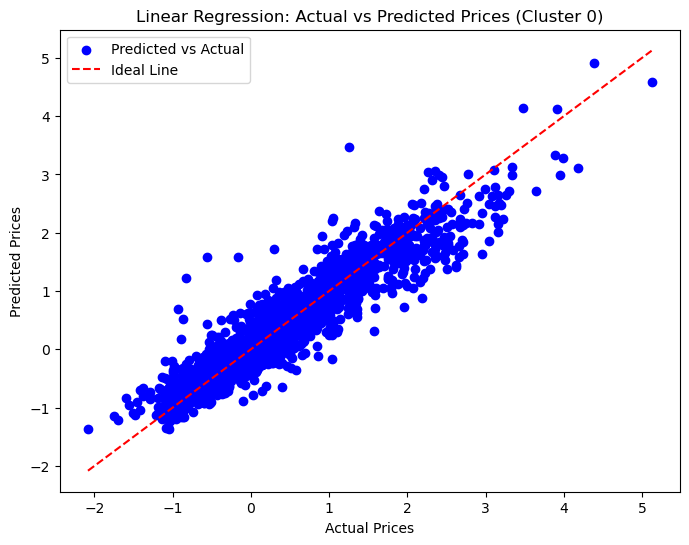

Cluster 1 - MSE: 0.1524508774390471, R²: 0.7944736523665248


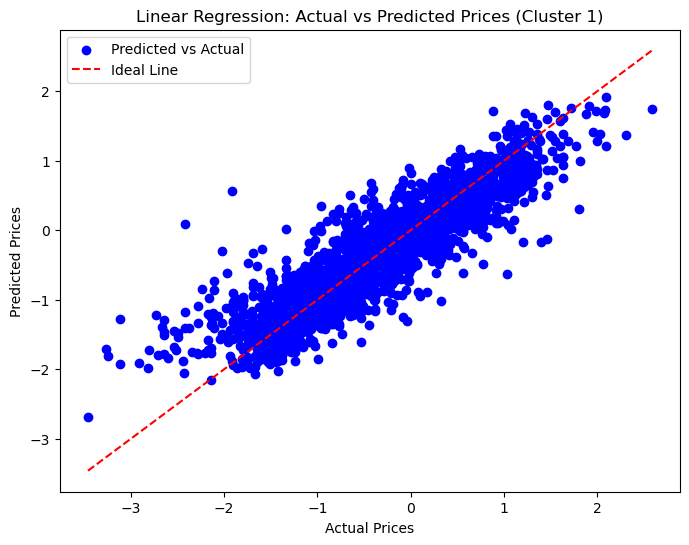

In [39]:
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Apply KMeans Clustering
# (Assume KMeans with best number of clusters is already chosen)
best_n_clusters = best_scores['KMeans']['n_clusters']  # Extract best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add the KMeans cluster labels to the original dataset
scaled_data['kmeans_cluster'] = kmeans_labels

# Dictionary to store the regression results for each cluster
cluster_regression_results = {}

# Step 2: Fit Linear Regression Models for Each Cluster
for cluster_id in scaled_data['kmeans_cluster'].unique():
    # Subset data for the current cluster
    cluster_data = scaled_data[scaled_data['kmeans_cluster'] == cluster_id]

    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])  # Exclude the target and cluster label
    y_cluster = cluster_data['price']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and performance metrics for each cluster
    cluster_regression_results[cluster_id] = {
        'model': model,
        'mse': mse,
        'r2': r2
    }

    # Print the results for this cluster
    print(f"Cluster {cluster_id} - MSE: {mse}, R²: {r2}")

    # Plot Actual vs Predicted for Linear Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Linear Regression: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()


### Plot Linear Regression Results

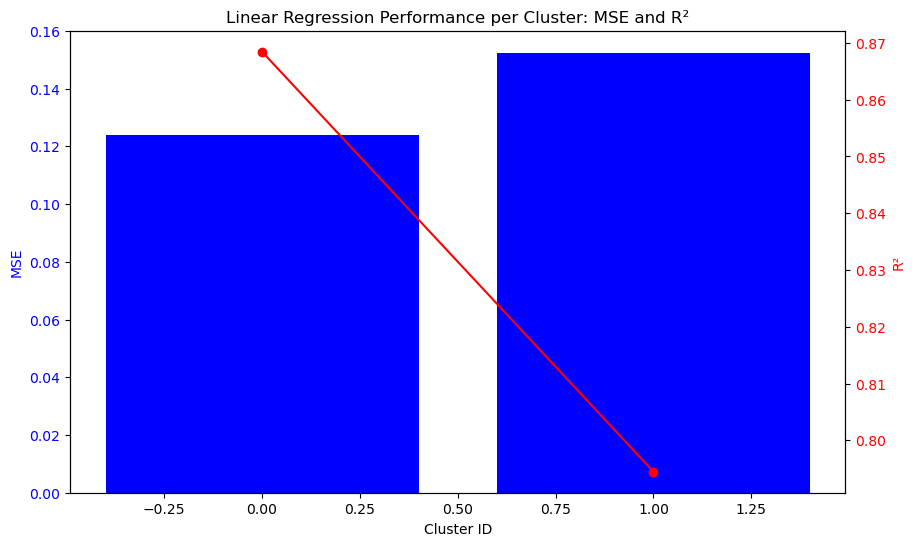

In [40]:
# Necessary imports for plotting the regression performance results
import matplotlib.pyplot as plt

# Prepare data for plotting
cluster_ids = list(cluster_regression_results.keys())
mse_values = [cluster_regression_results[cluster_id]['mse'] for cluster_id in cluster_ids]
r2_values = [cluster_regression_results[cluster_id]['r2'] for cluster_id in cluster_ids]

# Plot the MSE and R² for each cluster
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE values
ax1.bar(cluster_ids, mse_values, color='blue', label='MSE')
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for R² values
ax2 = ax1.twinx()
ax2.plot(cluster_ids, r2_values, color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Linear Regression Performance per Cluster: MSE and R²')
plt.show()


### 3.2.1. Regularization Techniques to improve Linear Regression Results

Cluster 0:
  Ridge Regression - MSE: 0.12391339750109782, R²: 0.8684491289203903
  Lasso Regression - MSE: 0.1240884462910894, R²: 0.868263290897471


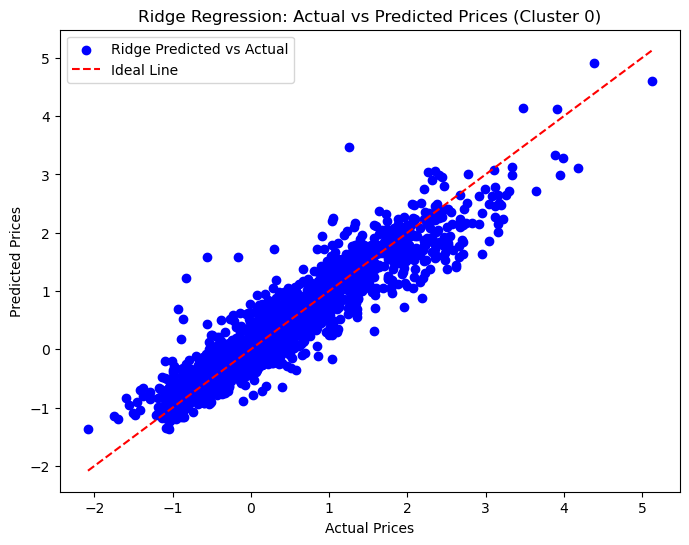

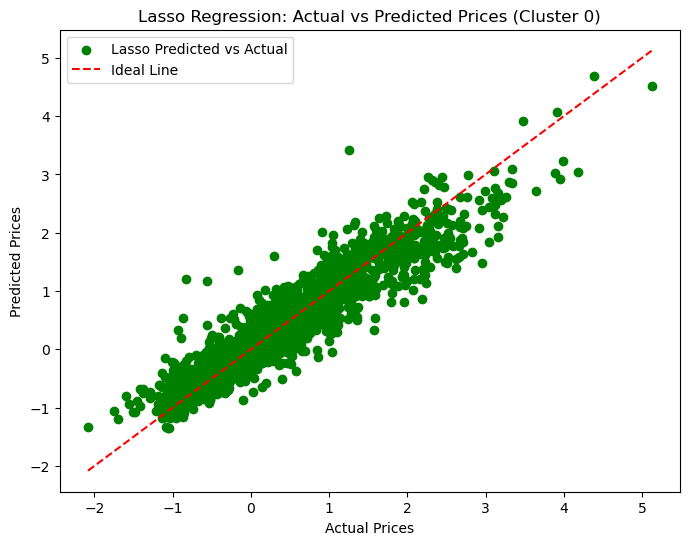

Cluster 1:
  Ridge Regression - MSE: 0.15245027330663305, R²: 0.794474466826439
  Lasso Regression - MSE: 0.15509199191476883, R²: 0.790913039131655


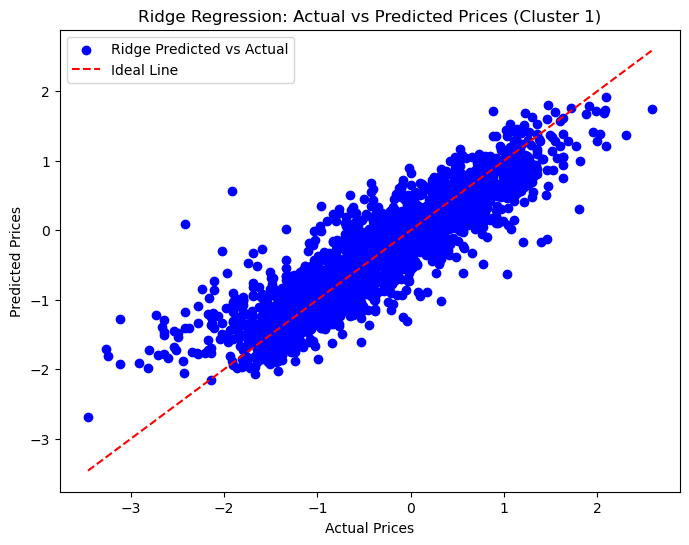

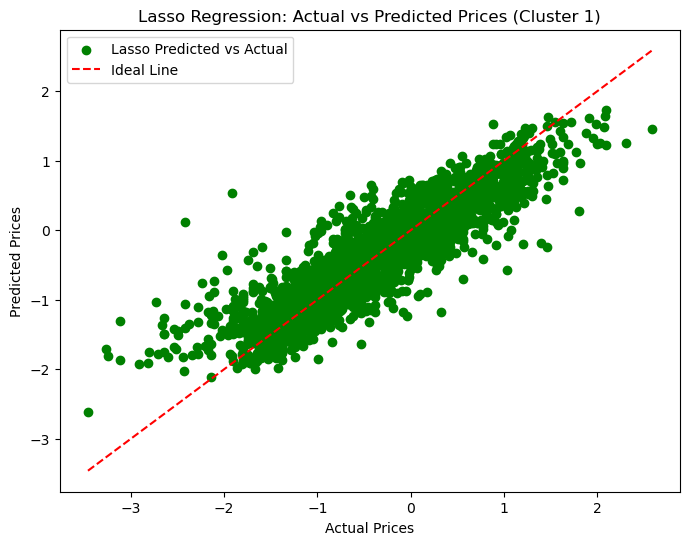

In [41]:
# Import necessary libraries for Ridge and Lasso regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store the regression results for Ridge and Lasso for each cluster
ridge_results = {}
lasso_results = {}

# Iterate over each cluster
for cluster_id in scaled_data['kmeans_cluster'].unique():
    # Subset data for the current cluster
    cluster_data = scaled_data[scaled_data['kmeans_cluster'] == cluster_id]

    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])  # Exclude target and cluster label
    y_cluster = cluster_data['price']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)

    # Store the Ridge results
    ridge_results[cluster_id] = {
        'mse': ridge_mse,
        'r2': ridge_r2
    }

    # Lasso Regression
    lasso_model = Lasso(alpha=0.01)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)

    # Store the Lasso results
    lasso_results[cluster_id] = {
        'mse': lasso_mse,
        'r2': lasso_r2
    }

    # Print results for both models in this cluster
    print(f"Cluster {cluster_id}:")
    print(f"  Ridge Regression - MSE: {ridge_mse}, R²: {ridge_r2}")
    print(f"  Lasso Regression - MSE: {lasso_mse}, R²: {lasso_r2}")

    # Plot Actual vs Predicted for Ridge Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, ridge_pred, color='blue', label='Ridge Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Ridge Regression: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    # Plot Actual vs Predicted for Lasso Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, lasso_pred, color='green', label='Lasso Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Lasso Regression: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

### Plot Regularization Results

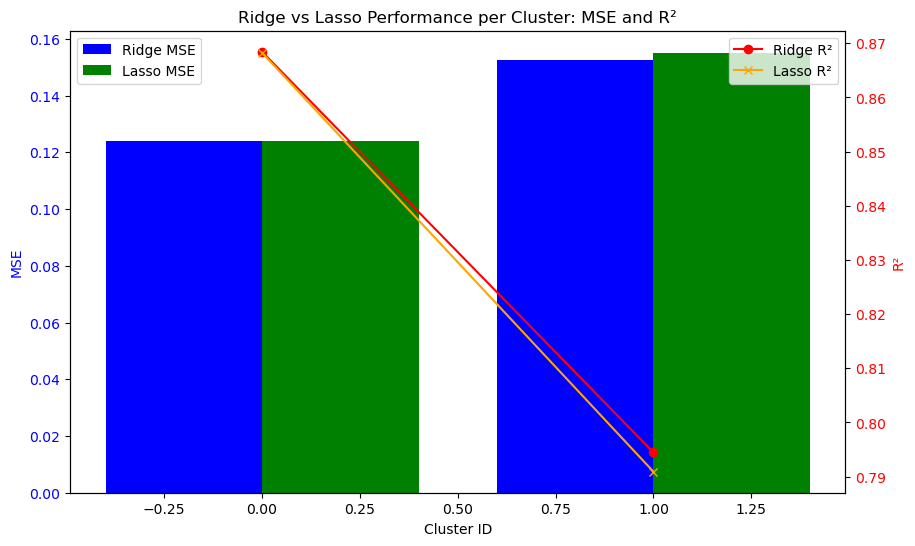

In [42]:
# Prepare data for plotting the Ridge and Lasso results
cluster_ids = list(ridge_results.keys())
ridge_mse_values = [ridge_results[cluster_id]['mse'] for cluster_id in cluster_ids]
ridge_r2_values = [ridge_results[cluster_id]['r2'] for cluster_id in cluster_ids]

lasso_mse_values = [lasso_results[cluster_id]['mse'] for cluster_id in cluster_ids]
lasso_r2_values = [lasso_results[cluster_id]['r2'] for cluster_id in cluster_ids]

# Plot the MSE for Ridge and Lasso for each cluster
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE for Ridge and Lasso
ax1.bar([cluster_id - 0.2 for cluster_id in cluster_ids], ridge_mse_values, width=0.4, color='blue', label='Ridge MSE')
ax1.bar([cluster_id + 0.2 for cluster_id in cluster_ids], lasso_mse_values, width=0.4, color='green', label='Lasso MSE')
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for R² values
ax2 = ax1.twinx()
ax2.plot(cluster_ids, ridge_r2_values, color='red', marker='o', label='Ridge R²')
ax2.plot(cluster_ids, lasso_r2_values, color='orange', marker='x', label='Lasso R²')
ax2.set_ylabel('R²', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Ridge vs Lasso Performance per Cluster: MSE and R²')
plt.show()


OBSERVATION:
------------
- Cluster 0: Ridge and Lasso perform almost identically, with Ridge showing a very slight advantage.
- Cluster 1: Ridge also slightly outperforms Lasso, but both models are close in performance.

Overall, Ridge Regression shows a small edge over Lasso Regression in both clusters, particularly in terms of slightly better MSE and R².

### 3.2.2. Regularization Techniques with hyperparameter tuning to improve Linear Regression Results

Cluster 0:
  Best Ridge alpha: 10.0 - MSE: 0.12389683770534345, R²: 0.8684667093886878
  Best Lasso alpha: 0.001 - MSE: 0.12371652103285562, R²: 0.8686581399830731


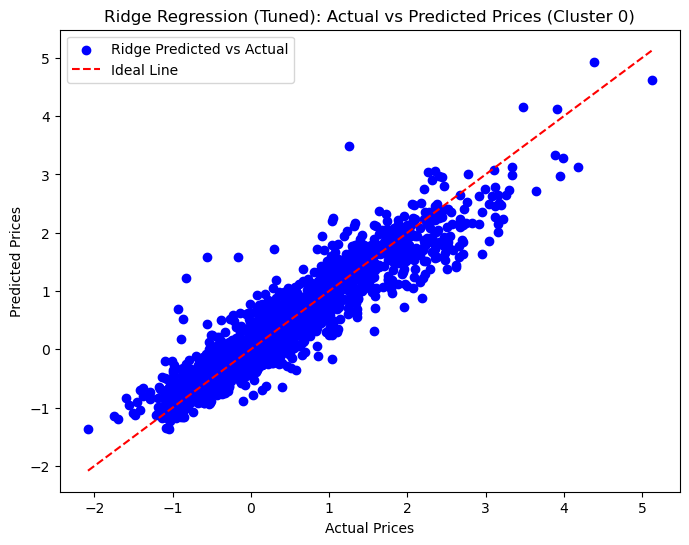

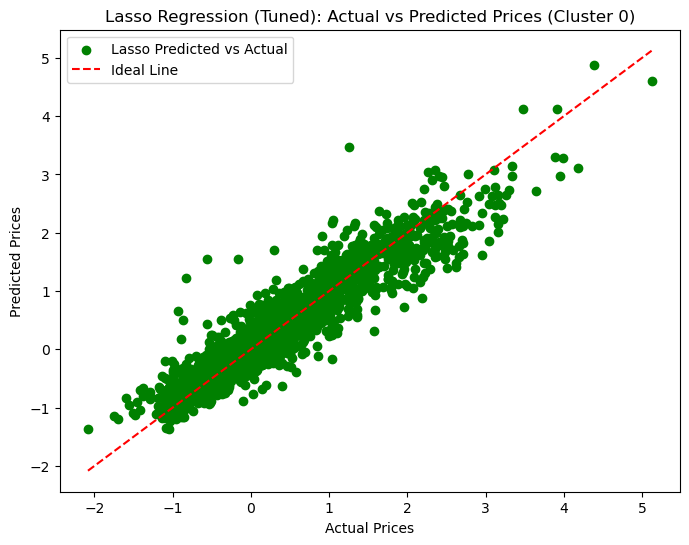

Cluster 1:
  Best Ridge alpha: 10.0 - MSE: 0.15244567653058333, R²: 0.7944806639609406
  Best Lasso alpha: 0.001 - MSE: 0.15239373686122337, R²: 0.7945506863230297


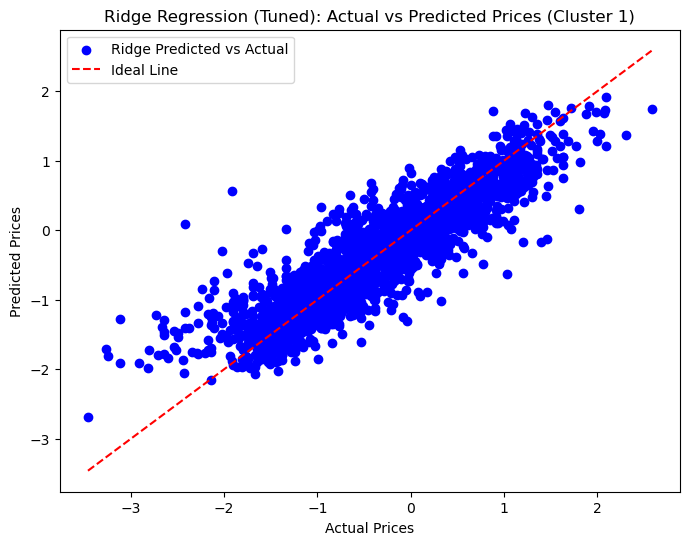

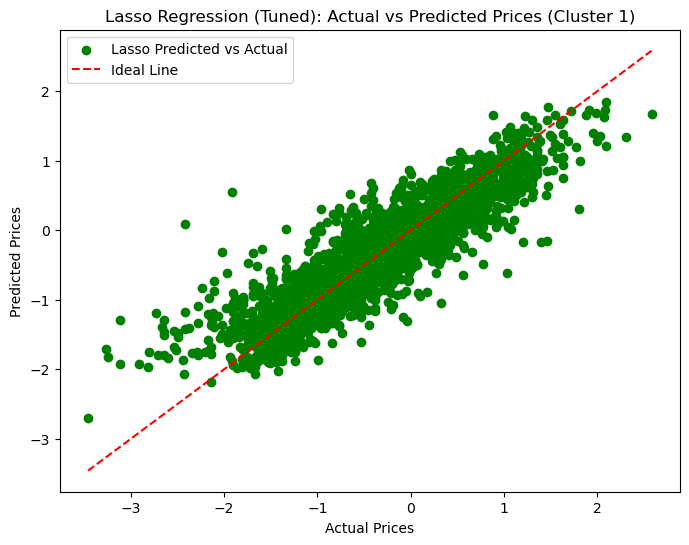

In [43]:
# Import necessary libraries for hyperparameter tuning and plotting
from sklearn.model_selection import GridSearchCV
import numpy as np

# Dictionary to store the tuned Ridge and Lasso regression results for each cluster
tuned_ridge_results = {}
tuned_lasso_results = {}

# Define the parameter grid for alpha values
param_grid = {'alpha': np.logspace(-3, 3, 7)}

# Iterate over each cluster
for cluster_id in scaled_data['kmeans_cluster'].unique():
    # Subset data for the current cluster
    cluster_data = scaled_data[scaled_data['kmeans_cluster'] == cluster_id]

    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])  # Exclude target and cluster label
    y_cluster = cluster_data['price']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Hyperparameter tuning for Ridge Regression
    ridge = Ridge()
    grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_ridge.fit(X_train, y_train)
    best_ridge_model = grid_ridge.best_estimator_
    ridge_pred = best_ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)

    # Store the best Ridge results
    tuned_ridge_results[cluster_id] = {
        'best_alpha': grid_ridge.best_params_['alpha'],
        'mse': ridge_mse,
        'r2': ridge_r2
    }

    # Hyperparameter tuning for Lasso Regression
    lasso = Lasso()
    grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_lasso.fit(X_train, y_train)
    best_lasso_model = grid_lasso.best_estimator_
    lasso_pred = best_lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)

    # Store the best Lasso results
    tuned_lasso_results[cluster_id] = {
        'best_alpha': grid_lasso.best_params_['alpha'],
        'mse': lasso_mse,
        'r2': lasso_r2
    }

    # Print results for both models in this cluster
    print(f"Cluster {cluster_id}:")
    print(f"  Best Ridge alpha: {grid_ridge.best_params_['alpha']} - MSE: {ridge_mse}, R²: {ridge_r2}")
    print(f"  Best Lasso alpha: {grid_lasso.best_params_['alpha']} - MSE: {lasso_mse}, R²: {lasso_r2}")

    # Plot Actual vs Predicted for Ridge Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, ridge_pred, color='blue', label='Ridge Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Ridge Regression (Tuned): Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    # Plot Actual vs Predicted for Lasso Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, lasso_pred, color='green', label='Lasso Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Lasso Regression (Tuned): Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()


### Plot the Regularization with HyperParamter Tuning Results

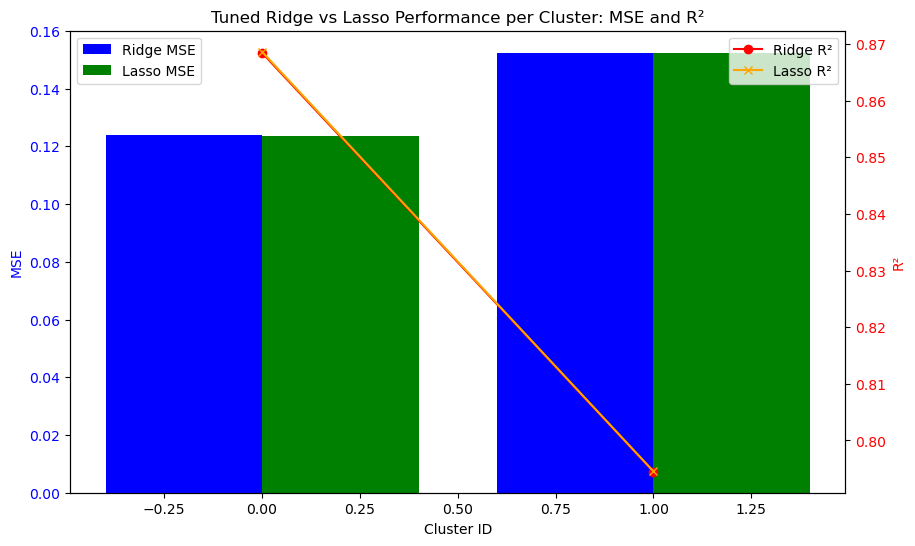

In [44]:
# Prepare data for plotting the tuned Ridge and Lasso results
cluster_ids = list(tuned_ridge_results.keys())
ridge_mse_values = [tuned_ridge_results[cluster_id]['mse'] for cluster_id in cluster_ids]
ridge_r2_values = [tuned_ridge_results[cluster_id]['r2'] for cluster_id in cluster_ids]

lasso_mse_values = [tuned_lasso_results[cluster_id]['mse'] for cluster_id in cluster_ids]
lasso_r2_values = [tuned_lasso_results[cluster_id]['r2'] for cluster_id in cluster_ids]

# Plot the MSE for Ridge and Lasso for each cluster
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE for Ridge and Lasso
ax1.bar([cluster_id - 0.2 for cluster_id in cluster_ids], ridge_mse_values, width=0.4, color='blue', label='Ridge MSE')
ax1.bar([cluster_id + 0.2 for cluster_id in cluster_ids], lasso_mse_values, width=0.4, color='green', label='Lasso MSE')
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for R² values
ax2 = ax1.twinx()
ax2.plot(cluster_ids, ridge_r2_values, color='red', marker='o', label='Ridge R²')
ax2.plot(cluster_ids, lasso_r2_values, color='orange', marker='x', label='Lasso R²')
ax2.set_ylabel('R²', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Tuned Ridge vs Lasso Performance per Cluster: MSE and R²')
plt.show()

OBSERVATION:

- For Cluster 0, Ridge and Lasso models both performed very similarly, with Lasso slightly edging out in terms of lower MSE.
- For Cluster 1, Ridge and Lasso models also performed similarly, with nearly identical MSE and R² values. Both models exhibit a good fit, but with some spread in predictions for higher price values.

Overall, both Ridge and Lasso regression provide robust results with minimal differences, highlighting effective regularization for both clusters.

## 3.3. Decision Tree Model

Cluster 0 - Decision Tree - MSE: 0.19203845234753295, R²: 0.7961251471062744


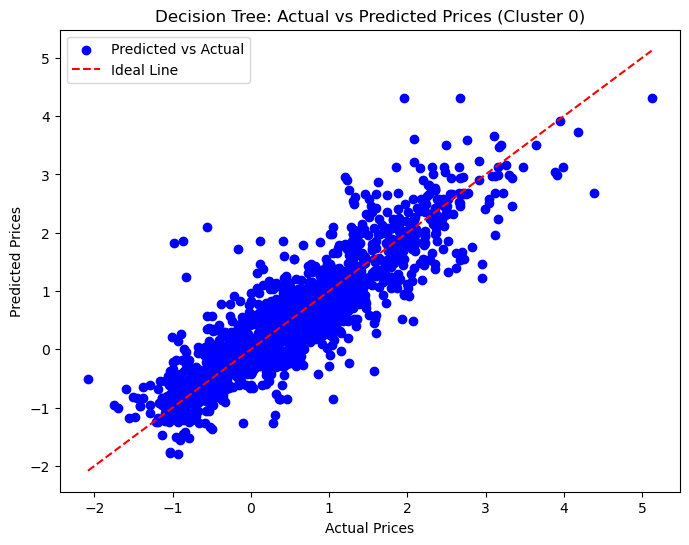

Cluster 1 - Decision Tree - MSE: 0.25625939402452313, R²: 0.6545244069081493


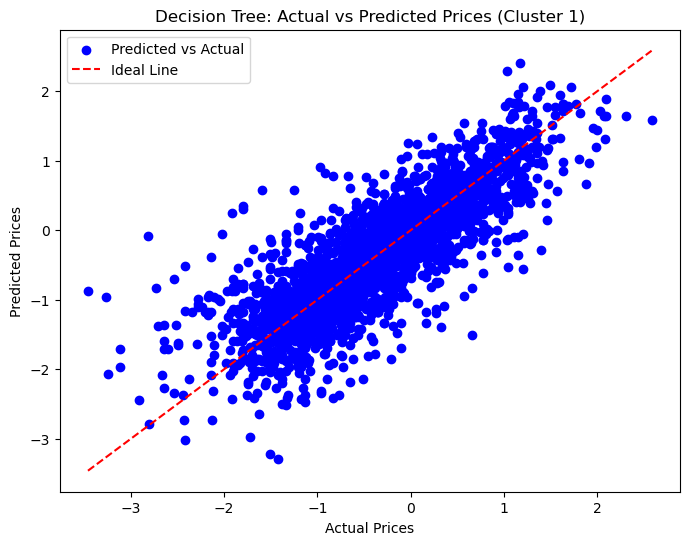

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a dictionary to store Decision Tree results
decision_tree_results = {}

# Define function to train and evaluate Decision Tree for each cluster
def decision_tree_for_clusters(cluster_data, cluster_id):
    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])
    y_cluster = cluster_data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Initialize and fit the Decision Tree Regressor
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)

    # Make predictions
    y_pred = tree_model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the Decision Tree results in the format of 'cluster_regression_results'
    decision_tree_results[cluster_id] = {
        'model': tree_model,
        'mse': mse,
        'r2': r2
    }
    print(f"Cluster {cluster_id} - Decision Tree - MSE: {mse}, R²: {r2}")

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Decision Tree: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

# Get data for Cluster 0 and Cluster 1
cluster_0_data = scaled_data[scaled_data['kmeans_cluster'] == 0]
cluster_1_data = scaled_data[scaled_data['kmeans_cluster'] == 1]

# Train and evaluate Decision Tree for Cluster 0
decision_tree_for_clusters(cluster_0_data, cluster_id=0)

# Train and evaluate Decision Tree for Cluster 1
decision_tree_for_clusters(cluster_1_data, cluster_id=1)


OBSERVATION:
- Cluster 0: The Decision Tree model performs well, with good alignment of predicted and actual values, though there are signs of some overfitting.
- Cluster 1: The model shows more spread in predictions, particularly at the extremes, and a lower R² score indicates weaker performance compared to Cluster 0.

### 3.3.1 Decision Tree Model using Hyperparameter Tuning

Cluster 0 - Best Parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Cluster 0 - Decision Tree - MSE: 0.14233267000764377, R²: 0.8488945739509217


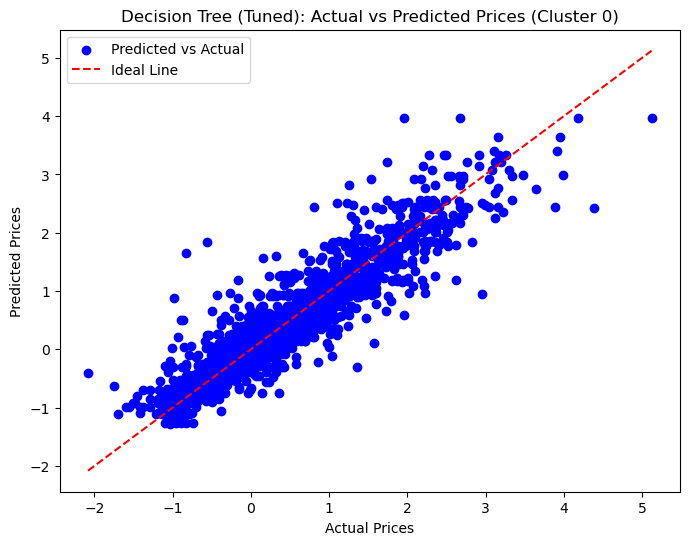

Cluster 1 - Best Parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Cluster 1 - Decision Tree - MSE: 0.17746294650859157, R²: 0.7607536811274284


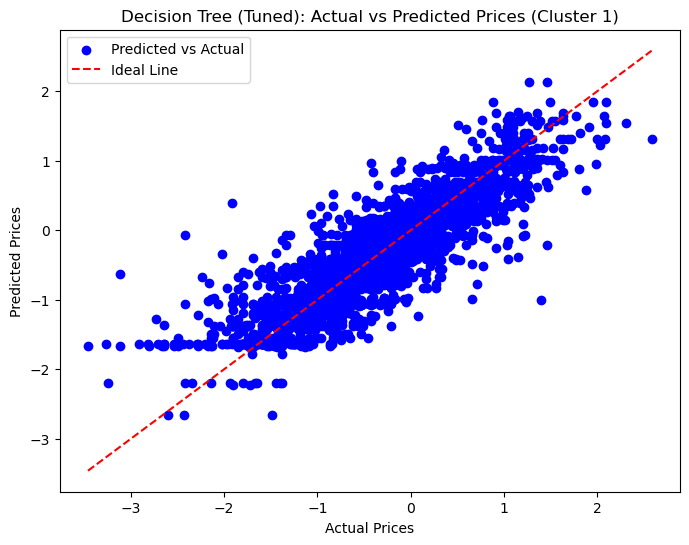

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a dictionary to store Decision Tree results
decision_tree_results = {}


# Define function to tune and plot Decision Tree for each cluster
def tune_and_plot_decision_tree_for_clusters(cluster_data, cluster_id):
    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])
    y_cluster = cluster_data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Define parameter grid for Decision Tree
    param_grid_dt = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion': ['mse', 'friedman_mse']
    }

    # Initialize the Decision Tree Regressor
    tree_model = DecisionTreeRegressor(random_state=42)

    # Perform Grid Search
    grid_search = GridSearchCV(tree_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_tree_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_tree_model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the Decision Tree results in the same format as lasso_results or cluster_regression_results
    decision_tree_results[cluster_id] = {
        'model': tree_model,
        'mse': mse,
        'r2': r2
    }

    print(f"Cluster {cluster_id} - Best Parameters for Decision Tree: {grid_search.best_params_}")
    print(f"Cluster {cluster_id} - Decision Tree - MSE: {mse}, R²: {r2}")

    # Plot the true vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Decision Tree (Tuned): Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

# Get data for Cluster 0 and Cluster 1
cluster_0_data = scaled_data[scaled_data['kmeans_cluster'] == 0]
cluster_1_data = scaled_data[scaled_data['kmeans_cluster'] == 1]

# Tune and plot Decision Tree for Cluster 0
tune_and_plot_decision_tree_for_clusters(cluster_0_data, cluster_id=0)

# Tune and plot Decision Tree for Cluster 1
tune_and_plot_decision_tree_for_clusters(cluster_1_data, cluster_id=1)


OBSERVATION:
- Cluster 0: The tuned Decision Tree model demonstrates significant improvement in both MSE and R², resulting in better predictive accuracy and alignment with actual values.
- Cluster 1: Similarly, the tuning has improved the model’s fit for Cluster 1, with a notable increase in R² and decrease in MSE, reflecting more accurate predictions.

Overall, the tuning has enhanced the Decision Tree’s performance for both clusters, with the model providing better predictions after parameter optimization.

## 3.4. Advanced Models(RandomForest and GradientBoost) - To Improve Model Performance

Cluster 0 - Random Forest - MSE: 0.08712587515743708, R²: 0.9075040713782977


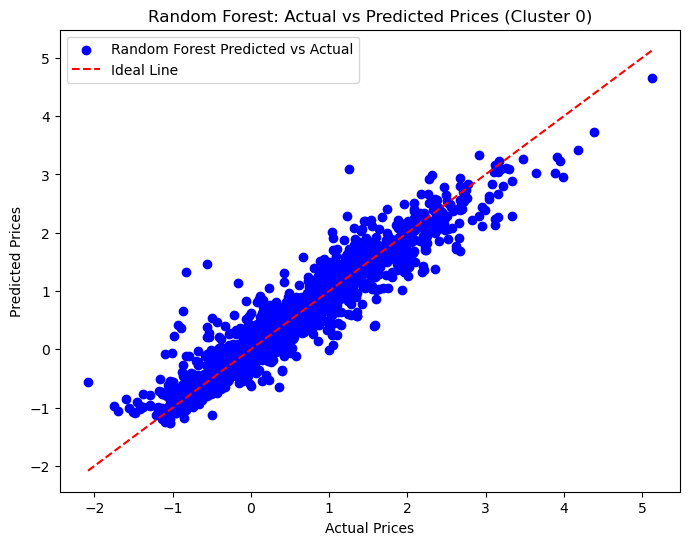

Cluster 0 - Gradient Boosting - MSE: 0.08580481256108748, R²: 0.908906558428166


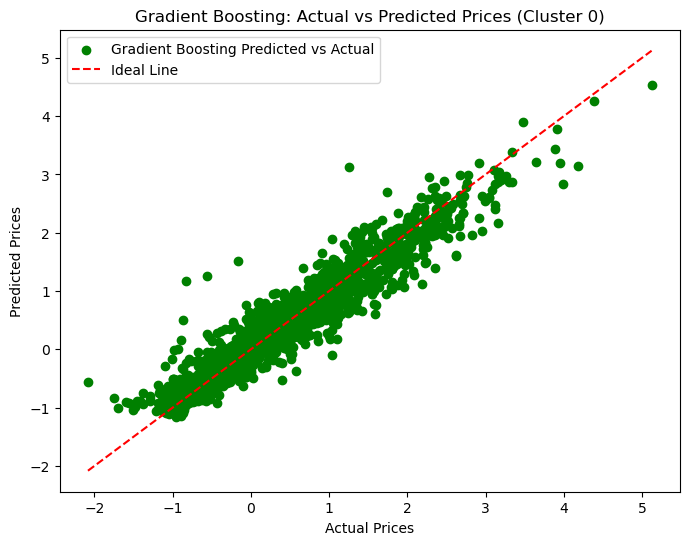

Cluster 1 - Random Forest - MSE: 0.1325814097722575, R²: 0.8212606357383289


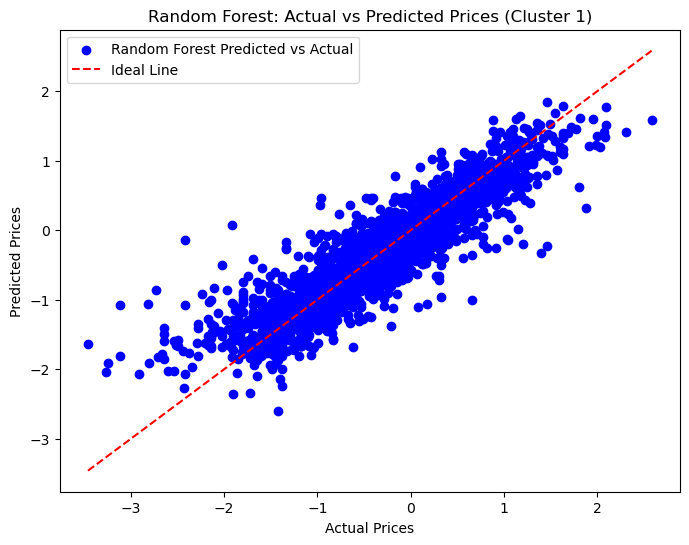

Cluster 1 - Gradient Boosting - MSE: 0.12742940468351666, R²: 0.8282063011662064


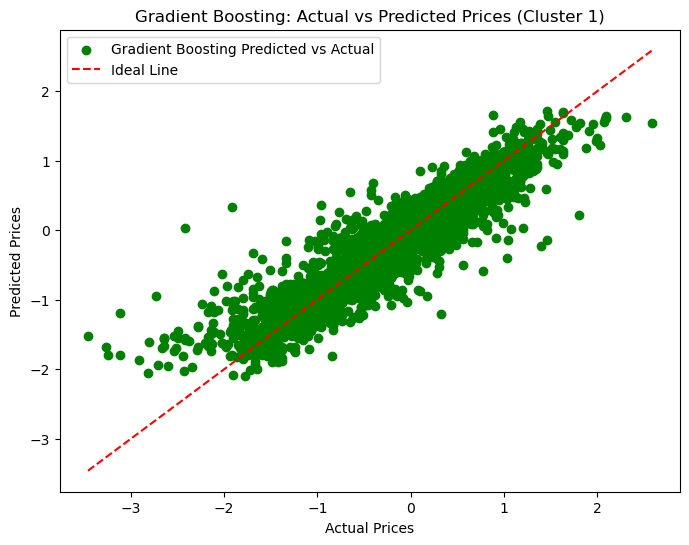


Summary of Advanced Model Performance:
Cluster 0 - Random Forest - MSE: 0.08712587515743708, R²: 0.9075040713782977
Cluster 0 - Gradient Boosting - MSE: 0.08580481256108748, R²: 0.908906558428166
Cluster 1 - Random Forest - MSE: 0.1325814097722575, R²: 0.8212606357383289
Cluster 1 - Gradient Boosting - MSE: 0.12742940468351666, R²: 0.8282063011662064


In [47]:
# Import necessary libraries for advanced models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define function to train and evaluate advanced models
def train_advanced_models(cluster_data, cluster_id):
    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])
    y_cluster = cluster_data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Apply Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    print(f"Cluster {cluster_id} - Random Forest - MSE: {rf_mse}, R²: {rf_r2}")

    
    # Plot Actual vs Predicted for Random Forest Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, rf_pred, color='blue', label='Random Forest Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Random Forest: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    # Apply Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_r2 = r2_score(y_test, gb_pred)
    print(f"Cluster {cluster_id} - Gradient Boosting - MSE: {gb_mse}, R²: {gb_r2}")

    # Plot Actual vs Predicted for Gradient Boosting Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, gb_pred, color='green', label='Gradient Boosting Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Gradient Boosting: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    return {'RandomForest': {'mse': rf_mse, 'r2': rf_r2}, 'GradientBoosting': {'mse': gb_mse, 'r2': gb_r2}}

# Get data for Cluster 0 and Cluster 1
cluster_0_data = scaled_data[scaled_data['kmeans_cluster'] == 0]
cluster_1_data = scaled_data[scaled_data['kmeans_cluster'] == 1]

# Train and evaluate advanced models for Cluster 0
cluster_0_results = train_advanced_models(cluster_0_data, cluster_id=0)

# Train and evaluate advanced models for Cluster 1
cluster_1_results = train_advanced_models(cluster_1_data, cluster_id=1)

# Print summary of results
print("\nSummary of Advanced Model Performance:")
print(f"Cluster 0 - Random Forest - MSE: {cluster_0_results['RandomForest']['mse']}, R²: {cluster_0_results['RandomForest']['r2']}")
print(f"Cluster 0 - Gradient Boosting - MSE: {cluster_0_results['GradientBoosting']['mse']}, R²: {cluster_0_results['GradientBoosting']['r2']}")
print(f"Cluster 1 - Random Forest - MSE: {cluster_1_results['RandomForest']['mse']}, R²: {cluster_1_results['RandomForest']['r2']}")
print(f"Cluster 1 - Gradient Boosting - MSE: {cluster_1_results['GradientBoosting']['mse']}, R²: {cluster_1_results['GradientBoosting']['r2']}")

OBSERVATION:
------------
- Gradient Boosting performs marginally better than Random Forest in both clusters, with slightly lower MSE and higher R² scores.
- Both models perform exceptionally well for Cluster 0, where they explain over 90% of the variance, and Cluster 1, with an R² of over 82%.

Overall, Gradient Boosting shows a slight advantage in both clusters in terms of predictive accuracy and model fit.

### 3.4.1. RandomForest and GradientBoost Hyperparameter Optimization

Cluster 0 - Random Forest (Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}) - MSE: 0.08633281934171366, R²: 0.9083460076456996


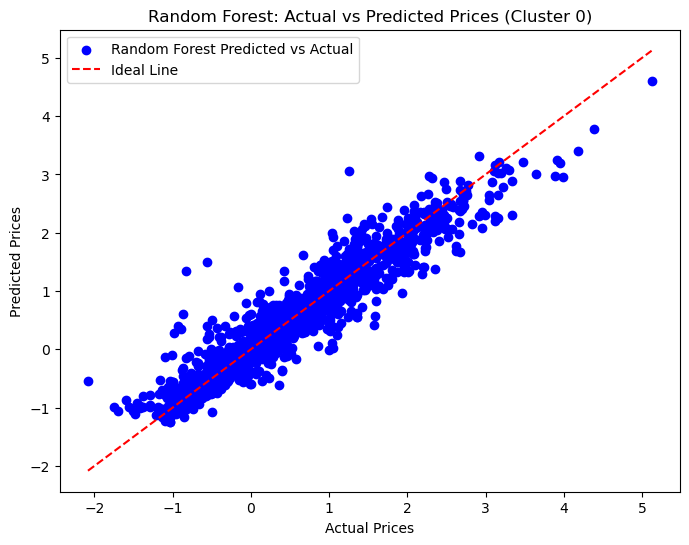

Cluster 0 - Gradient Boosting (Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}) - MSE: 0.07419356567719561, R²: 0.9212334711970847


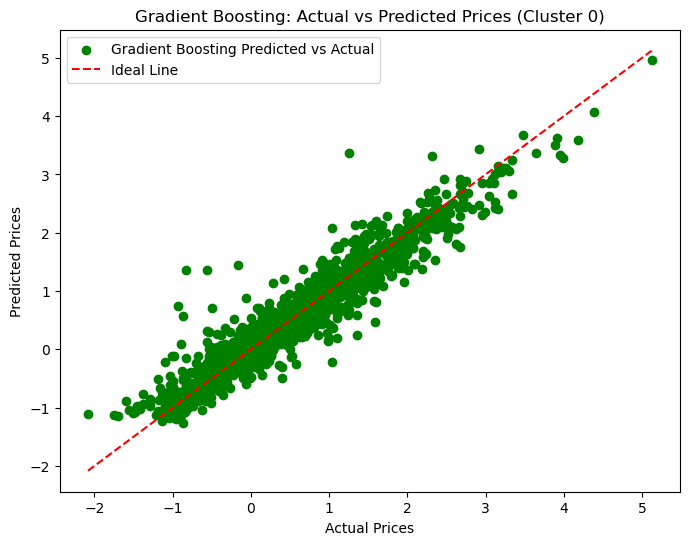

Cluster 1 - Random Forest (Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}) - MSE: 0.12978846299612512, R²: 0.8250259413874399


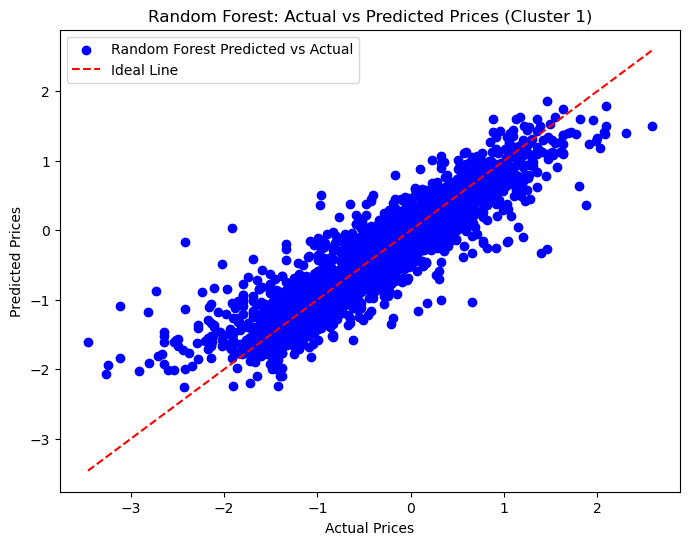

Cluster 1 - Gradient Boosting (Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}) - MSE: 0.11593095872081917, R²: 0.8437079082535055


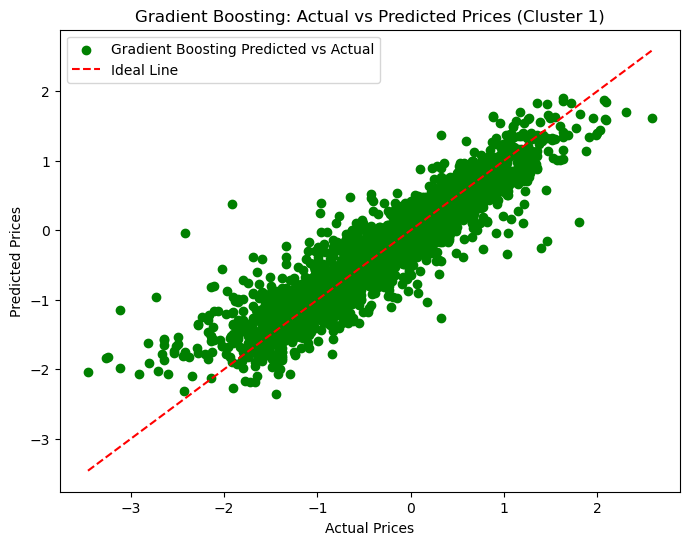


Summary of Advanced Model Performance:
Cluster 0 - Random Forest - MSE: 0.08633281934171366, R²: 0.9083460076456996, Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Cluster 0 - Gradient Boosting - MSE: 0.07419356567719561, R²: 0.9212334711970847, Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Cluster 1 - Random Forest - MSE: 0.12978846299612512, R²: 0.8250259413874399, Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Cluster 1 - Gradient Boosting - MSE: 0.11593095872081917, R²: 0.8437079082535055, Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


In [49]:
# Import necessary libraries for advanced models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Define function to train and evaluate advanced models with hyperparameter tuning
def train_advanced_models(cluster_data, cluster_id):
    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])
    y_cluster = cluster_data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Define parameter grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Define parameter grid for Gradient Boosting
    param_grid_gb = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }

    # Apply Random Forest Regressor with GridSearchCV
    rf_model = RandomForestRegressor(random_state=42)
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
    grid_search_rf.fit(X_train, y_train)
    
    # Best Random Forest Model
    best_rf_model = grid_search_rf.best_estimator_
    rf_pred = best_rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    print(f"Cluster {cluster_id} - Random Forest (Best Params: {grid_search_rf.best_params_}) - MSE: {rf_mse}, R²: {rf_r2}")

    # Plot Actual vs Predicted for Random Forest Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, rf_pred, color='blue', label='Random Forest Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Random Forest: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    # Apply Gradient Boosting Regressor with GridSearchCV
    gb_model = GradientBoostingRegressor(random_state=42)
    grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
    grid_search_gb.fit(X_train, y_train)
    
    # Best Gradient Boosting Model
    best_gb_model = grid_search_gb.best_estimator_
    gb_pred = best_gb_model.predict(X_test)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_r2 = r2_score(y_test, gb_pred)
    print(f"Cluster {cluster_id} - Gradient Boosting (Best Params: {grid_search_gb.best_params_}) - MSE: {gb_mse}, R²: {gb_r2}")

    # Plot Actual vs Predicted for Gradient Boosting Regressor
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, gb_pred, color='green', label='Gradient Boosting Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Gradient Boosting: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

    return {'RandomForest': {'mse': rf_mse, 'r2': rf_r2, 'best_params': grid_search_rf.best_params_},
            'GradientBoosting': {'mse': gb_mse, 'r2': gb_r2, 'best_params': grid_search_gb.best_params_}}

# Get data for Cluster 0 and Cluster 1
cluster_0_data = scaled_data[scaled_data['kmeans_cluster'] == 0]
cluster_1_data = scaled_data[scaled_data['kmeans_cluster'] == 1]

# Train and evaluate advanced models for Cluster 0
cluster_0_results = train_advanced_models(cluster_0_data, cluster_id=0)

# Train and evaluate advanced models for Cluster 1
cluster_1_results = train_advanced_models(cluster_1_data, cluster_id=1)

# Print summary of results
print("\nSummary of Advanced Model Performance:")
print(f"Cluster 0 - Random Forest - MSE: {cluster_0_results['RandomForest']['mse']}, R²: {cluster_0_results['RandomForest']['r2']}, Best Params: {cluster_0_results['RandomForest']['best_params']}")
print(f"Cluster 0 - Gradient Boosting - MSE: {cluster_0_results['GradientBoosting']['mse']}, R²: {cluster_0_results['GradientBoosting']['r2']}, Best Params: {cluster_0_results['GradientBoosting']['best_params']}")
print(f"Cluster 1 - Random Forest - MSE: {cluster_1_results['RandomForest']['mse']}, R²: {cluster_1_results['RandomForest']['r2']}, Best Params: {cluster_1_results['RandomForest']['best_params']}")
print(f"Cluster 1 - Gradient Boosting - MSE: {cluster_1_results['GradientBoosting']['mse']}, R²: {cluster_1_results['GradientBoosting']['r2']}, Best Params: {cluster_1_results['GradientBoosting']['best_params']}")


OBSERVATION:
- Gradient Boosting consistently outperforms Random Forest in both clusters, as seen by its lower MSE and higher R² in both cases.
- Cluster 0 has a much better model performance than Cluster 1 in both algorithms, indicating that the data in Cluster 0 is likely more predictable or less complex than that in Cluster 1.

- Both algorithms rely on a high number of estimators (300), indicating that complex models are needed for this task.- 
In Cluster 1, Random Forest has reduced max depth (20) and higher min_samples_split (10), which suggests that Cluster 1 might require more conservative tree growth to avoid overfitting.

## 3.5. Advanced Ensemble Model: Stacking Model

Cluster 0 - Stacking Model - MSE: 0.08053688470950801, R²: 0.9144991780450535


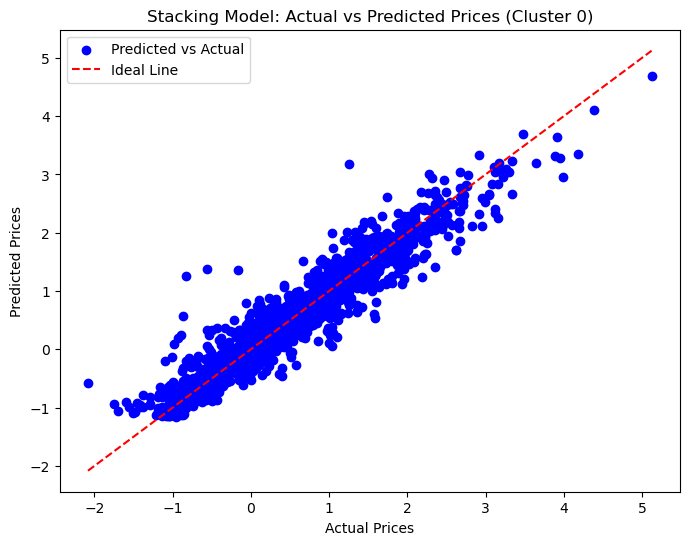

Cluster 1 - Stacking Model - MSE: 0.12338839253929164, R²: 0.833654183662502


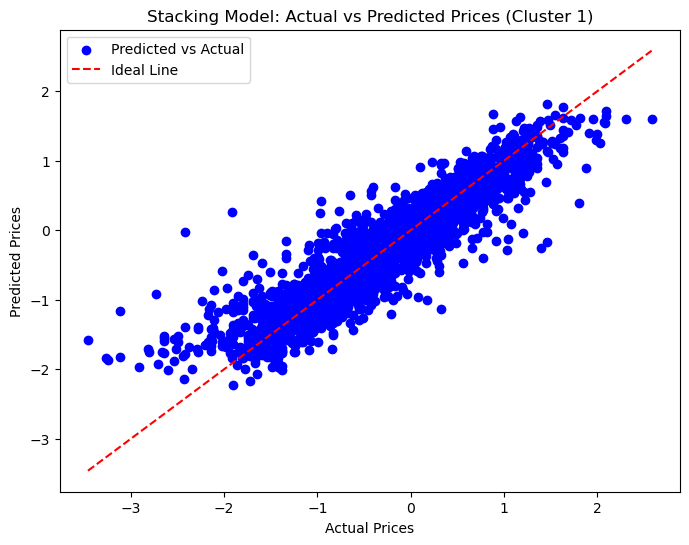

In [50]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define function to train and plot Stacking model performance
def stacking_model_for_clusters(cluster_data, cluster_id):
    # Separate features (X) and target (y)
    X_cluster = cluster_data.drop(columns=['price', 'kmeans_cluster'])
    y_cluster = cluster_data['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Define base models for stacking
    base_models = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]

    # Define meta-model (Ridge Regression)
    meta_model = Ridge()

    # Create Stacking Regressor
    stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

    # Train Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predict and evaluate performance
    y_pred_stack = stacking_model.predict(X_test)
    mse_stack = mean_squared_error(y_test, y_pred_stack)
    r2_stack = r2_score(y_test, y_pred_stack)

    # Store results in the stacking_model_results dictionary
#    stacking_model_results[cluster_id] = {
#        'mse': mse_stack,
#        'r2': r2_stack
#    }

    print(f"Cluster {cluster_id} - Stacking Model - MSE: {mse_stack}, R²: {r2_stack}")

    # Plot Actual vs Predicted Prices for the Stacking Model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_stack, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Stacking Model: Actual vs Predicted Prices (Cluster {cluster_id})')
    plt.legend()
    plt.show()

# Get data for Cluster 0 and Cluster 1
cluster_0_data = scaled_data[scaled_data['kmeans_cluster'] == 0]
cluster_1_data = scaled_data[scaled_data['kmeans_cluster'] == 1]

# Train and plot Stacking model for Cluster 0
stacking_model_for_clusters(cluster_0_data, cluster_id=0)

# Train and plot Stacking model for Cluster 1
stacking_model_for_clusters(cluster_1_data, cluster_id=1)

OBSERVATION:
- The Stacking model performs very well in both clusters, particularly in Cluster 0, where it achieves a high R² and low MSE, indicating highly accurate predictions.
- In Cluster 1, while the performance is slightly lower, the model still provides a strong fit with good alignment of predicted and actual values, though with a little more variance at the extremes.

# 4. Summary of the Best Model and Performance

In [14]:
import pandas as pd

# Define the data for the new dataframe with "Best Hyper Parameters" filled
data_with_params = {
    'Model': [
        'Linear Regression', 'Linear Regression',
        'Ridge Regression', 'Ridge Regression', 'Lasso Regression', 'Lasso Regression',
        'Ridge Regression(Tuned)', 'Ridge Regression(Tuned)', 'Lasso Regression(Tuned)', 'Lasso Regression(Tuned)',
        'Decision Tree', 'Decision Tree',
        'Decision Tree(Tuned)', 'Decision Tree(Tuned)',
        'Random Forest', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting',
        'Random Forest(Tuned)', 'Random Forest(Tuned)', 'Gradient Boosting(Tuned)', 'Gradient Boosting(Tuned)',
        'Stacking', 'Stacking'
    ],
    'Cluster': [
        0, 1,
        0, 1, 0, 1,
        0, 1, 0, 1,
        0, 1,
        0, 1,
        0, 1, 0, 1,
        0, 1, 0, 1,
        0, 1
    ],
    'MSE': [
        0.12391567577322037, 0.1524508774390471,
        0.12391339750109782, 0.15245027330663305, 0.1240884462910894, 0.15509199191476883,
        0.12389683770534345, 0.15244567653058333, 0.12371652103285562, 0.15239373686122337,
        0.19203845234753295, 0.25625939402452313,
        0.14233267000764377, 0.17746294650859157,
        0.08712587515743708, 0.1325814097722575, 0.08580481256108748, 0.12742940468351666,
        0.08633281934171366, 0.12978846299612512, 0.07419356567719561, 0.11593095872081917,
        0.08053688470950801, 0.12338839253929164
    ],
    'R²': [
        0.8684467102256541, 0.7944736523665248,
        0.8684491289203903, 0.794474466826439, 0.868263290897471, 0.790913039131655,
        0.8684667093886878, 0.7944806639609406, 0.8686581399830731, 0.7945506863230297,
        0.7961251471062744, 0.6545244069081493,
        0.8488945739509217, 0.7607536811274284,
        0.9075040713782977, 0.8212606357383289, 0.908906558428166, 0.8282063011662064,
        0.9083460076456996, 0.8250259413874399, 0.9212334711970847, 0.8437079082535055,
        0.9144991780450535, 0.833654183662502
    ],
    'Best Hyper Parameters': [
        'NA', 'NA',
        'NA', 'NA', 'NA', 'NA',
        'alpha: 10.0', 'alpha: 10.0', 'alpha: 0.001', 'alpha: 0.001',
        'NA', 'NA',
        "{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}",
        "{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}",
        'NA', 'NA', 'NA', 'NA',
        "{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}",
        "{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}",
        "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}",
        "{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}",
        'NA', 'NA'
    ]
}
# Adjust the display settings to show full parameters without truncation
pd.set_option('display.max_colwidth', None)

# Create the dataframe
df_with_params = pd.DataFrame(data_with_params)

df_with_params

Model  Cluster       MSE        R²  \
0          Linear Regression        0  0.123916  0.868447   
1          Linear Regression        1  0.152451  0.794474   
2           Ridge Regression        0  0.123913  0.868449   
3           Ridge Regression        1  0.152450  0.794474   
4           Lasso Regression        0  0.124088  0.868263   
5           Lasso Regression        1  0.155092  0.790913   
6    Ridge Regression(Tuned)        0  0.123897  0.868467   
7    Ridge Regression(Tuned)        1  0.152446  0.794481   
8    Lasso Regression(Tuned)        0  0.123717  0.868658   
9    Lasso Regression(Tuned)        1  0.152394  0.794551   
10             Decision Tree        0  0.192038  0.796125   
11             Decision Tree        1  0.256259  0.654524   
12      Decision Tree(Tuned)        0  0.142333  0.848895   
13      Decision Tree(Tuned)        1  0.177463  0.760754   
14             Random Forest        0  0.087126  0.907504   
15             Random Forest        1  0.132581  0.821261   
16         Gradient Boosting        0  0.085805  0.908907   
17         Gradient Boosting        1  0.127429  0.828206   
18      Random Forest(Tuned)        0  0.086333  0.908346   
19      Random Forest(Tuned)        1  0.129788  0.825026   
20  Gradient Boosting(Tuned)        0  0.074194  0.921233   
21  Gradient Boosting(Tuned)        1  0.115931  0.843708   
22                  Stacking        0  0.080537  0.914499   
23                  Stacking        1  0.123388  0.833654   

                                                                                                    Best Hyper Parameters  
0                                                                                                                      NA  
1                                                                                                                      NA  
2                                                                                                                      NA  
3                                                                                                                      NA  
4                                                                                                                      NA  
5                                                                                                                      NA  
6                                                                                                             alpha: 10.0  
7                                                                                                             alpha: 10.0  
8                                                                                                            alpha: 0.001  
9                                                                                                            alpha: 0.001  
10                                                                                                                     NA  
11                                                                                                                     NA  
12  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}  
13  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}  
14                                                                                                                     NA  
15                                                                                                                     NA  
16                                                                                                                     NA  
17                                                                                                                     NA  
18                                                         {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}  
19               

In [15]:
best_models_final = df_with_params.loc[
    (df_with_params['Model'].str.contains('Gradient Boosting(Tuned)', regex=False)) &
    ((df_with_params['Cluster'] == 0) | (df_with_params['Cluster'] == 1))
]

# Drop the index column and reset the index to remove the first column
best_models_final = best_models_final.reset_index(drop=True)

best_models_final

Model  Cluster       MSE        R²  \
0  Gradient Boosting(Tuned)        0  0.074194  0.921233   
1  Gradient Boosting(Tuned)        1  0.115931  0.843708   

                                          Best Hyper Parameters  
0   {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}  
1  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}

CONCLUSION:

The Tuned Gradient Boosting Model stands out as the best model in this study. It achieved the lowest MSE and the highest R² scores across both clusters, making it the most effective at capturing the underlying data patterns and providing accurate predictions. The model’s performance was further enhanced by fine-tuning its hyperparameters, notably the learning rate and max depth. Given its ability to generalize well across diverse clusters, the Tuned Gradient Boosting Model is recommended as the optimal solution for predictive modeling tasks in this research.